# **1. Veri Setini Yükleme ve Genel Yapısını İnceleme**

### 1.1. Kütüphaneleri Yükleme

In [ ]:
!pip install catboost

In [ ]:
# ==========================
# Temel Veri İşleme ve Sayısal İşlemler
# ==========================
import pandas as pd
import numpy as np

# ==========================
# Görselleştirme Kütüphaneleri
# ==========================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==========================
# İstatistiksel Analiz
# ==========================
from scipy.stats import skew
from scipy import stats

# ==========================
# Veri Ön İşleme
# ==========================
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

# ==========================
# Modelleme ve Değerlendirme Araçları
# ==========================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# ==========================
# Makine Öğrenmesi Modelleri
# ==========================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ==========================
# Boosting Algoritmaları
# ==========================
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb



In [ ]:
import warnings # warningleri kapatma
warnings.filterwarnings("ignore")

### 1.2. Veri Setini Yükleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path ='/content/drive/MyDrive/veri/Pokemon.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-9')

### 1.3. Veri Setinin Genel Yapısını İnceleme ve Görselleştirme

In [ ]:
df.head() #veri setinin ilk 5 satırı

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


| **Sütun Adı**        | **Açıklama**                                                                 |
|----------------------|------------------------------------------------------------------------------|
| `#`                  | Pokemonun veri kümesindeki sıralama numarası veya kimliği.                 |
| `Name`               | Pokemonun ismi. Görselleştirme ve tanımlamada kullanılabilir.                  |
| `Type 1`             | Pokemonun birincil tipi (örneğin: Fire, Water). Kategorik değişkendir.     |
| `Type 2`             | Pokemonun varsa ikincil tipi. Bazı Pokemonlar sadece `Type 1`'e sahiptir.  |
| `Total`              | Tüm istatistiklerin (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) toplamı. |
| `HP`                 | “Health Points” yani can puanı. Ne kadar hasar alabileceğini gösterir.      |
| `Attack`             | Fiziksel saldırı gücü. Fiziksel saldırılarda etkili olur.                   |
| `Defense`            | Fiziksel savunma gücü. Fiziksel saldırılara karşı dayanıklılığı gösterir.   |
| `Sp. Atk`            | Özel saldırı gücü. Büyü/özel güçlere dayalı saldırıların gücünü belirler.   |
| `Sp. Def`            | Özel savunma gücü. Özel saldırılardan alınan hasarı azaltır.                |
| `Speed`              | Hız. Dövüşte önce saldıran Pokemonu belirler.                              |
| `Generation`         | Pokemonun ait olduğu nesil (1–6). Zamanla gelen yeni kuşakları gösterir.   |
| `Legendary`          | Pokemonun efsanevi olup olmadığını belirtir (`True` veya `False`).         |

---


In [ ]:
df.tail() #veri setinin son 5 satırı

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [ ]:
df.shape #veri setinin satır-sütun sayısı

(800, 13)

In [ ]:
df.info() #Veri setinin genel bilgilerini, sütun tiplerini ve eksik değer durumunu anlama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe() # Sayısal sütunların temel istatistiksel özetini (ortalama, std, min, max vb.) inceleme

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df.describe(include='object').T #object (yani kategorik veya metin türü) sütunlar için istatistiksel özet inceleme

,count,unique,top,freq
Name,800,800,PumpkabooSuper Size,1
Type 1,800,18,Water,112
Type 2,414,18,Flying,97


In [ ]:
df.nunique() # dfnin içindeki benzersiz değerlerin sayısını inceleme

,0
#,721
Name,800
Type 1,18
Type 2,18
Total,200
HP,94
Attack,111
Defense,103
Sp. Atk,105
Sp. Def,92


In [ ]:
df['Generation'].unique() # mesela Generation için olan 6 benzersiz değerimiz

array([1, 2, 3, 4, 5, 6])

In [ ]:
df['Attack'].unique() # mesela Attack için olan 111 benzersiz değerimiz

array([ 49,  62,  82, 100,  52,  64,  84, 130, 104,  48,  63,  83, 103,
        30,  20,  45,  35,  25,  90, 150,  60,  80,  56,  81,  85,  55,
        75,  47,  92,  57,  72, 102,  70,  41,  76,  50,  65,  95, 105,
       110,  40, 120,  73,   5, 125,  67, 155,  10, 115, 135, 134, 190,
        46,  38,  58,  33, 185, 164, 160,  51,  71,  91, 140,  43,  78,
        15, 165,  68,  23, 145, 180,  89, 109,  66,  86,  42,  29,  59,
        79,  69,  94, 136,  93,  24, 170, 112,  61, 106, 132, 123,  88,
        53,  98,  77,  27, 117, 108,  44,  87, 147,  74, 124,  97, 129,
       128, 107,  36,  22,  54, 121, 131])

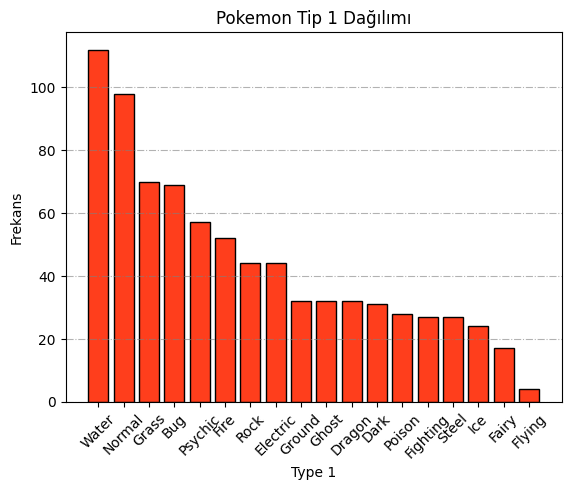

In [ ]:
# 'Type 1' sütunundaki her tipin sayısını hesaplama
type_counts = df['Type 1'].value_counts()

plt.bar(type_counts.index, type_counts.values, color='#FF3E1C', edgecolor='black')

plt.title("Pokemon Tip 1 Dağılımı")
plt.xlabel("Type 1")
plt.ylabel("Frekans")
plt.xticks(rotation=45)  # Tip isimlerini daha rahat okuyabilmek için eğ
plt.grid(axis='y', linestyle='-.', color='gray', alpha=0.6)
plt.show()

**Pokemon Tip 1 Dağılımı**

Pokemon veri setindeki Type 1 (birincil tip) sütununa ait verilerin dağılımını görmek için bar grafiği çizdim. Grafikte, her pokemon tipi ve o tipe ait pokemon sayısı (frekans) gösterildi.
Grafikte dikkat çeken noktalar şunlardır:

- Water tipi açık ara en yüksek frekansa sahip olup 100'ü aşkın pokemon sayısı ile zirvede yer alıyor. Flying tipi ise en düşük frekansa sahip olup yaklaşık 4-5 pokemon ile en az temsil edilen tip durumunda. Normal, Grass ve Bug tipleri de yüksek frekanslara sahip olup sırasıyla 60- 100 arasında pokemon sayısına sahipler.

Bu sonuç, veri setinde bazı pokemon tiplerinin (özellikle Water ve Normal) oldukça yaygın olduğunu, bazı tiplerin ise (Flying, Ice, Fairy gibi) nadir bulunduğunu göstermektedir.

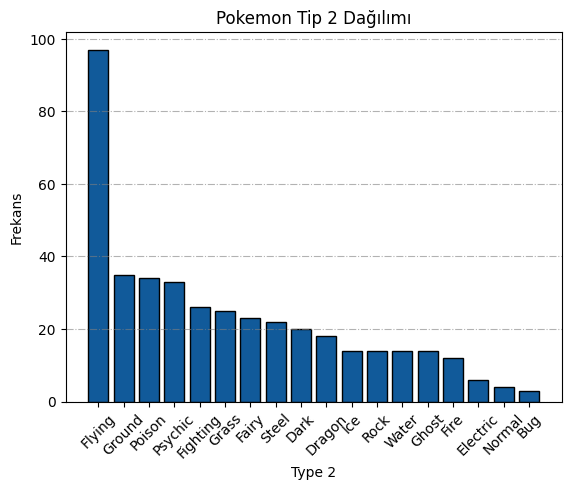

In [ ]:
# 'Type 2' sütunundaki her tipin sayısını hesaplama
type_counts = df['Type 2'].value_counts()

plt.bar(type_counts.index, type_counts.values, color='#115a9a', edgecolor='black')

plt.title("Pokemon Tip 2 Dağılımı")
plt.xlabel("Type 2")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-.', color='gray', alpha=0.6)
plt.show()

**Pokemon Type 2 Dağılımı**

Pokemon veri setindeki Type 2 (ikincil tip) sütununa ait verilerin dağılımını görmek için bar grafiği çizdim. Grafikte, her pokemon tipi ve o tipe ait pokemon sayısı (frekans) gösterildi.
Grafikte dikkat çeken noktalar şunlardır:

- Flying tipi açık ara en yüksek frekansa sahip olup 100'e yakın pokemon sayısı ile zirvede yer alıyor. Bug tipi ise en düşük frekansa sahip olup yaklaşık 3-4 pokemon ile en az temsil edilen tip durumunda.
Ground, Poison ve Psychic tipleri de yüksek frekanslara sahip olup 40'a yakın pokemon sayısına sahipler.

Bu sonuç, veri setinde ikincil tip olarak Flying tipinin oldukça yaygın kullanıldığını, diğer tiplerin ise daha dengeli bir dağılım gösterdiğini ortaya koymaktadır. Ayrıca birçok pokemon tipinin ikincil tip olarak nadiren kullanıldığı da görülmektedir.

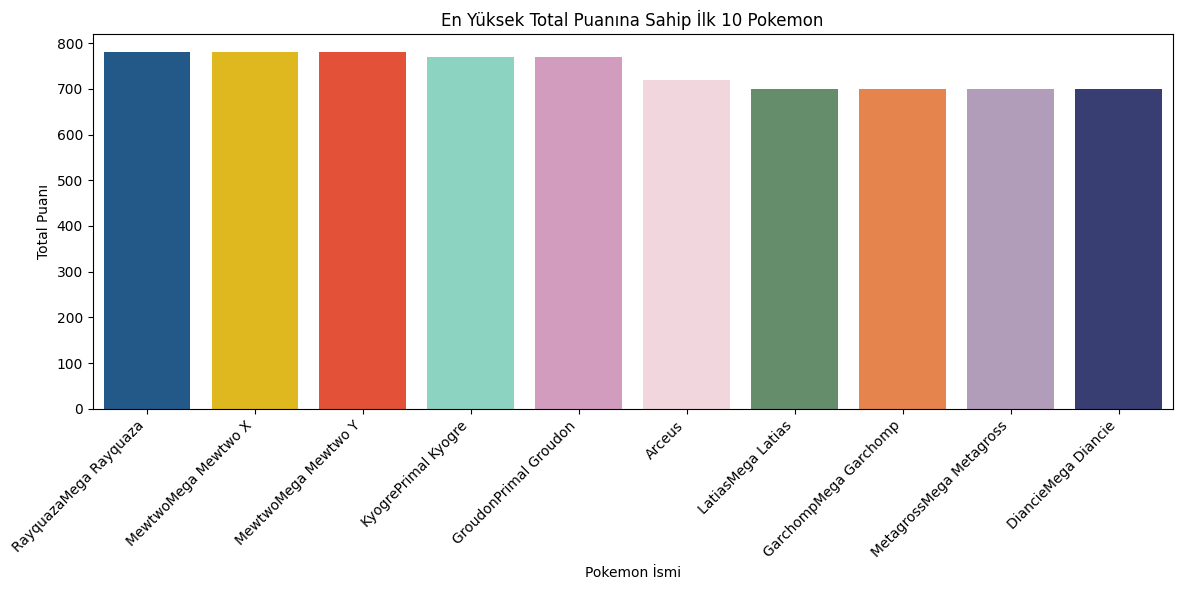

In [ ]:
# En yüksek 'Total' puanına sahip ilk 10 Pokemonun isimlerine göre renkli bar grafiği çizimi
top10 = df.sort_values('Total', ascending=False).head(10)

pokemon_colors = ['#115a9a', '#ffcb00', '#FF3E1C', '#80dfc7', '#da93c0', '#f6d1db', '#5f9266', '#fe7f34',  '#b397bf', '#2f367a']

plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Total', data=top10, palette=pokemon_colors)
plt.title('En Yüksek Total Puanına Sahip İlk 10 Pokemon')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Puanı')
plt.xlabel('Pokemon İsmi')
plt.tight_layout()
plt.show()


**En Yüksek Total Puanına Sahip İlk 10 Pokemon**

Pokemon veri setindeki toplam güç puanlarına göre en güçlü 10 pokemonu görmek için bar grafiği çizdim. Grafikte, her pokemonun ismi ve toplam güç puanı (Total Puanı) gösterildi.
Grafikte dikkat çeken noktalar şunlardır:

- RayquazaMega Rayquaza en yüksek toplam puana sahip olup 780 civarı bir puanla zirvede yer alıyor. DianciaMega Diancia en düşük puana sahip olup yaklaşık 700 puanla bu liste içerisinde son sırada yer alıyor.
MewtwoMega Mewtwo X ve MewtwoMega Mewtwo Y de yüksek puanlara sahip olup her ikisi de 780 civarında güç puanına sahipler.

Bu sonuç, veri setinde en güçlü pokemonların hem Mega evrim geçirmiş formlar hem de efsanevi pokemonlardan oluştuğunu göstermektedir. Listede KyogrePrimal, GroudonPrimal ve Arceus gibi efsanevi pokemonların yanı sıra çeşitli Mega evrim formları da yer almaktadır.



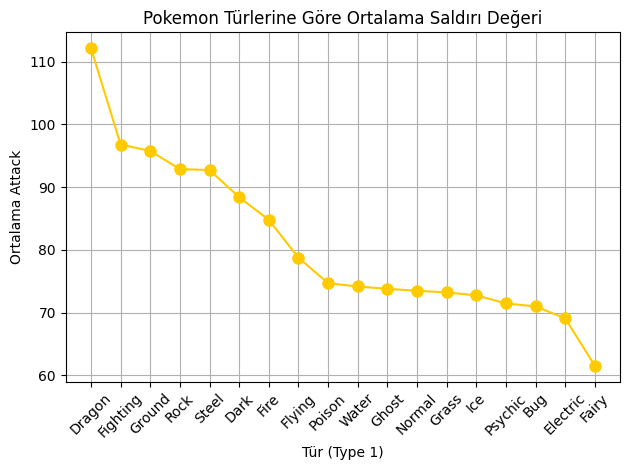

In [ ]:
# Pokemon türlerine göre ortalama 'Attack' değerlerinin çizgi grafiği ile görselleştirilmesi
type_attack = df.groupby('Type 1')['Attack'].mean().sort_values(ascending=False).head(20)

plt.plot(type_attack.index, type_attack.values, marker='o', linestyle='-', color='#ffcb00', markersize=8)
plt.title('Pokemon Türlerine Göre Ortalama Saldırı Değeri')
plt.xlabel('Tür (Type 1)')
plt.ylabel('Ortalama Attack')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Type 1 Attack Dağılımı**

Pokemon veri setindeki Type 1 (birincil tip) verilerine göre her pokemon tipinin ortalama saldırı gücünü görmek için çizgi grafiği çizdim. Grafikte, her pokemon tipi ve o tipe ait ortalama saldırı değeri gösterildi.
Grafikte dikkat çeken noktalar şunlardır:

- Dragon tipi en yüksek ortalama saldırı değerine sahip olup 110'u aşkın puanla zirvede yer alıyor.
Buna karşın, Fairy tipi en düşük ortalama saldırı değerine sahip olup yaklaşık 60 puanla son sırada yer alıyor.
Fighting, Ground, Rock ve Steel tipleri de yüksek saldırı değerlerine sahip olup 90-100 puan aralığında yer alıyorlar.

Bu sonuç, veri setinde Dragon tipli pokemonların en saldırgan karaktere sahip olduğunu, Fairy tipli pokemonların ise en düşük saldırı gücüne sahip olduğunu göstermektedir. Ayrıca grafikteki genel eğilimin azalan yönde olması, pokemon tiplerinin saldırı güçleri açısından belirgin farklar gösterdiğini ortaya koymaktadır.

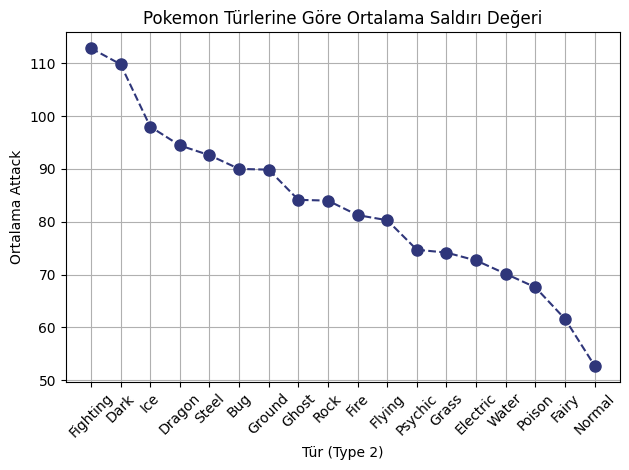

In [ ]:
# Pokemon türlerine göre ortalama 'Attack' değerlerinin çizgi grafiği ile görselleştirilmesi
type_attack = df.groupby('Type 2')['Attack'].mean().sort_values(ascending=False).head(20)

plt.plot(type_attack.index, type_attack.values, marker='o', linestyle='--', color='#2f367a', markersize=8)
plt.title('Pokemon Türlerine Göre Ortalama Saldırı Değeri')
plt.xlabel('Tür (Type 2)')
plt.ylabel('Ortalama Attack')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Type 2 Attack Dağılımı**

Pokemon veri setindeki Type 2 (ikincil tip) verilerine göre her pokemon tipinin ortalama saldırı gücünü görmek için çizgi grafiği çizdim. Grafikte, her pokemon tipi ve o tipe ait ortalama saldırı değeri gösterildi.
Grafikte dikkat çeken noktalar şunlardır:

- Fighting tipi en yüksek ortalama saldırı değerine sahip olup 110'u aşkın puanla zirvede yer alıyor. Normal tipi ise en düşük ortalama saldırı değerine sahip olup yaklaşık 50 puanla son sırada yer alıyor.
Dark tipi de en yüksek 2. saldırı değerine sahip olup 110 puan civarında yer alıyor.

Bu sonuç, veri setinde ikincil tip olarak Fighting tipine sahip pokemonların en yüksek saldırı gücüne sahip olduğunu, Normal tipli pokemonların ise en düşük saldırı gücüne sahip olduğunu göstermektedir. Ayrıca grafikteki keskin düşüş eğilimi, pokemon tiplerinin saldırı güçleri arasında oldukça büyük farklar olduğunu ortaya koymaktadır.

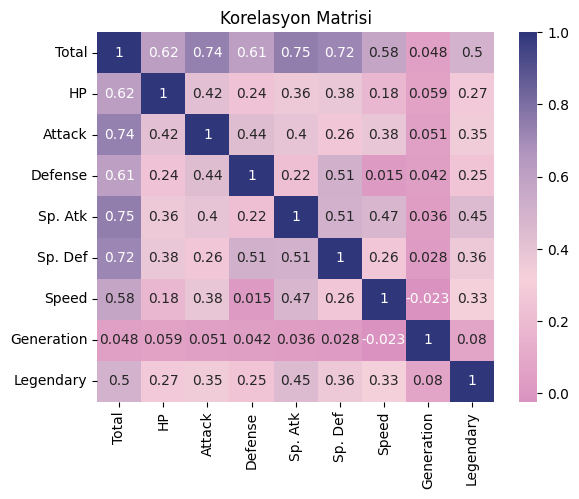

In [ ]:
# Analiz için '#' sütununu düşürüyoruz çünkü anlamsız sütunumuz..
corr = df.drop(columns=['#']).corr(numeric_only=True)

# Daha önce seçtiğim Pokemon renklerinden oluşan özel renk paleti tanımlanıyorum.
pokecolor = [ '#da93c0', '#f6d1db', '#b397bf', '#2f367a']

# Bu renk paletinden 256 tonlu bir colormap oluşturuyorum..
pokemon_cmap = mcolors.LinearSegmentedColormap.from_list("pokemon_cmap", pokecolor, N=256)

# Korelasyon ısı haritası çizimi
sns.heatmap(corr, annot=True, cmap=pokemon_cmap)
plt.title("Korelasyon Matrisi")
plt.show()


**Korelasyon Matrisi**

Pokemon veri setindeki farklı değişkenler arasındaki ilişkileri görmek için korelasyon matrisi çizdim. Matriste, her değişken çifti arasındaki korelasyon katsayısı ve renk yoğunluğu ile ilişkinin gücü gösterildi.

Önemli gözlemler:


Total ile Sp. At arasında en yüksek pozitif korelasyon bulunuyor (0.75), bu da toplam güç ile özel saldırı gücü arasında güçlü bir ilişki olduğunu gösteriyor.
Ancak generation ile Speed arasında en düşük korelasyon var (-0.023), bu değişkenler arasında neredeyse hiç ilişki yok.
Total ile Attack (0.74) ve Total ile Sp. Def (0.72) arasında da güçlü pozitif korelasyonlar mevcut.

Bu sonuç, veri setinde pokemonların toplam gücünün özellikle saldırı yetenekleri (Attack ve Sp. Atk) ile güçlü bir şekilde ilişkili olduğunu göstermektedir. Ayrıca Generation değişkeninin diğer pokemon özelliklerini önemli ölçüde etkilemediği de görülmektedir.

Attack sütununun skewness değeri: 0.5516


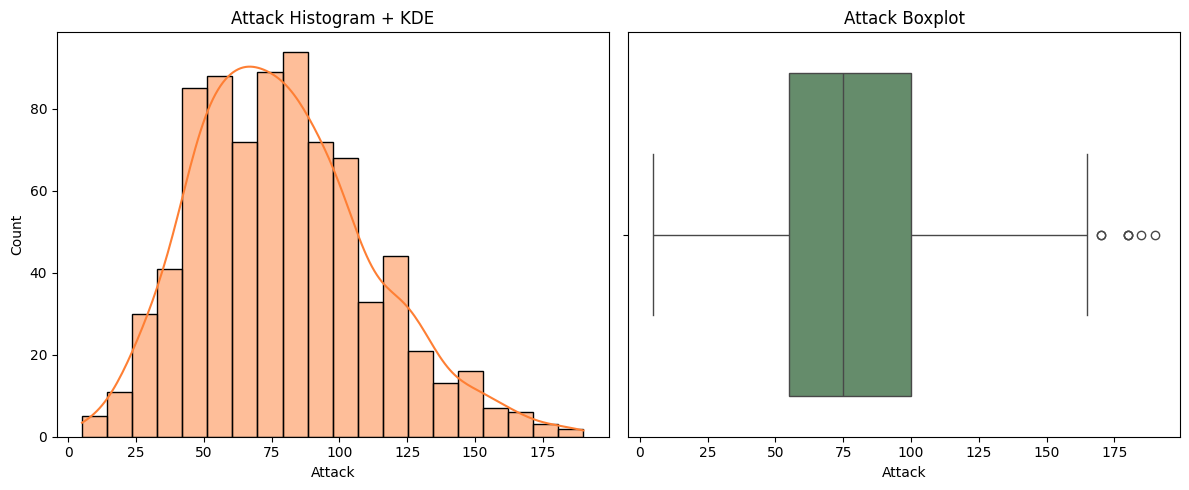

In [ ]:
# Skewness hesapla
skewness = df['Attack'].skew()
print(f"Attack sütununun skewness değeri: {skewness:.4f}")

# Grafik alanı oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Attack'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Attack Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Attack'], ax=axes[1], color='#5f9266')
axes[1].set_title('Attack Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Attack (Saldırı) Dağılım Analizi**


---



Sol tarafta histogram ve KDE grafiği ile Saldırı (Attack) değerlerinin dağılımı, sağ tarafta ise boxplot ile özet istatistikler gösterilmiştir.

**Histogram ve KDE Analizi**

- Attack değerlerinin dağılımı, 75-80 aralığında en yüksek frekansa sahiptir ve bu aralıkta 80'in üzerinde Pokemon bulunmaktadır.  
- 125'in üzerindeki saldırı değerlerine sahip Pokemon sayısı oldukça azdır ve dağılım bu noktadan sonra hızla azalmaktadır.  
- KDE eğrisi, yaklaşık 75 (75'e yakın) civarında tepe noktasına ulaşmakta ve ardından sağa doğru uzun bir kuyruk oluşturarak yavaşça azalmaktadır. Sağa çarpıklık belirgin şekilde görülmektedir.

**Skewness (Çarpıklık) Analizi**

- Skewness değeri 0.5516 olup, dağılımın orta derecede sağa çarpık olduğunu göstermektedir.  
- Bu değer, grafikten gözlemlenen sağa çarpıklığı doğrulamaktadır ve savunma değerine göre daha az çarpık bir dağılım sergiler.

**Boxplot Detaylı Analizi**

- Minimum değer: 0-25 arasında, 0'a çok daha yakın.
- Birinci Çeyrek (Q1 - %25'lik dilim): Yaklaşık 50 civarında, kutunun alt sınırını oluşturuyor.  
- Medyan (Q2 - %50'lik dilim): Yaklaşık 75 civarında, kutu içindeki kalın çizgi ile gösteriliyor.  
- Üçüncü Çeyrek (Q3 - %75'lik dilim): Yaklaşık 100 civarında, kutunun üst sınırını oluşturuyor.  
- Maksimum değer: Yaklaşık 165 civarında.  
- Aykırı Değerler (Outliers): 175'in üzerindeki saldırı değerlerinde 4 adet belirgin aykırı veri bulunmaktadır.

**Sonuç**

Kutunun alt ve üst sınırları (Q1 ve Q3) medyan çizgisinden nispeten dengeli uzaklıktadır, ancak üst kısım biraz daha geniş görünmektedir. Bu durum, verinin hafif sağa çarpık dağılımını boxplot açısından da desteklemektedir. Attack dağılımı, Defense dağılımına kıyasla daha simetrik bir yapı sergiler ve Pokemonların saldırı değerleri savunma değerlerine göre daha normal dağılıma yakın bir pattern göstermektedir.


Defense sütununun skewness değeri: 1.1559


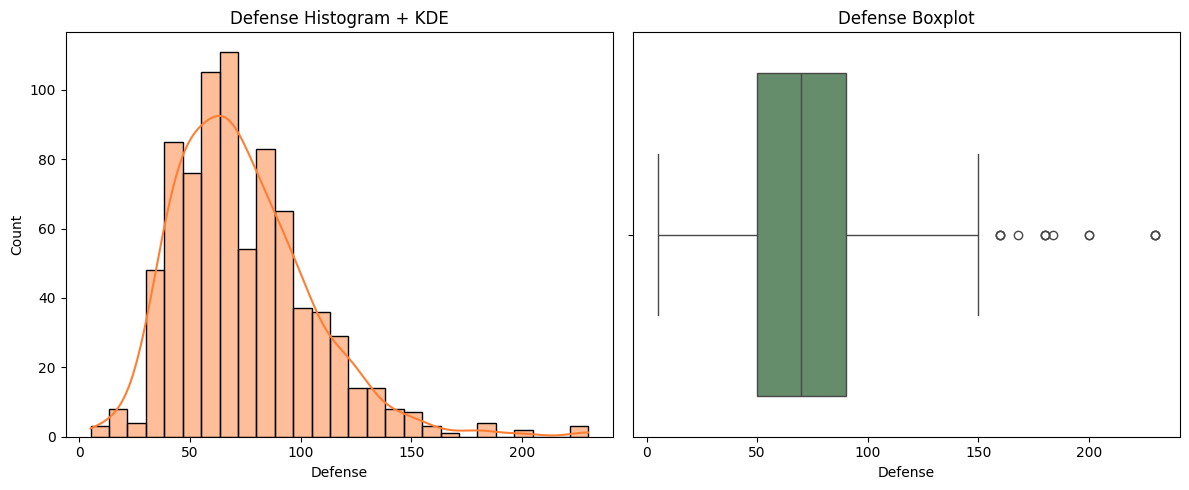

In [ ]:
# Skewness hesapla
skewness = df['Defense'].skew()
print(f"Defense sütununun skewness değeri: {skewness:.4f}")

# Grafik alanı oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Defense'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Defense Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Defense'], ax=axes[1], color='#5f9266')
axes[1].set_title('Defense Boxplot')

plt.tight_layout()
plt.show()


**Pokemon Veri Setinde Defense (Savunma) Dağılım Analizi**


---



Sol tarafta histogram ve KDE grafiği ile Savunma (Defense) değerlerinin dağılımı, sağ tarafta ise boxplot ile özet istatistikler gösterilmiştir.

**Histogram ve KDE Analizi**

- Defense değerlerinin dağılımı, 60-70 aralığında en yüksek frekansa sahiptir ve bu aralıkta 100'ün üzerinde Pokemon bulunmaktadır.  
- 150'nin üzerindeki savunma değerlerine sahip Pokemon sayısı oldukça azdır; 200'ün üzerinde ise neredeyse hiç Pokemon yoktur.  
- KDE eğrisi, yaklaşık 65 civarında tepe noktasına ulaşmakta ve ardından sağa doğru uzun bir kuyruk oluşturarak yavaşça azalmaktadır. Buradan dağılımın güçlü bir şekilde sağa çarpık olduğu sonucu çıkarılabilir.

**Skewness (Çarpıklık) Analizi**

- Skewness değeri 1.1559 olup, dağılımın güçlü derecede sağa çarpık olduğunu göstermektedir.  
- Bu değer, grafikten çıkarılan sağa çarpıklık yorumunu belirgin şekilde doğrulamaktadır.

**Boxplot Detaylı Analizi**

- Minimum değer: 0 ile 50 arasında, 0'a daha yakın.
- Birinci Çeyrek (Q1 - %25'lik dilim): Yaklaşık 50 civarında, kutunun alt sınırını oluşturuyor.  
- Medyan (Q2 - %50'lik dilim): Yaklaşık 70 civarında, kutu içindeki kalın çizgi ile gösteriliyor.  
- Üçüncü Çeyrek (Q3 - %75'lik dilim): Yaklaşık 100 civarında, kutunun üst sınırını oluşturuyor.  
- Maksimum değer: 150 civarında.  
- Aykırı Değerler (Outliers): 150'nin üzerindeki savunma değerlerinde 6 adet belirgin aykırı değer bulunmaktadır.

Sonuç olarak kutunun alt ve üst sınırları (Q1 ve Q3) medyan çizgisinden yaklaşık olarak eşit uzaklıktadır; bu da verinin orta kısmında simetrik bir dağılım olduğunu gösterir.


Sp. Atk sütununun skewness değeri: 0.7447


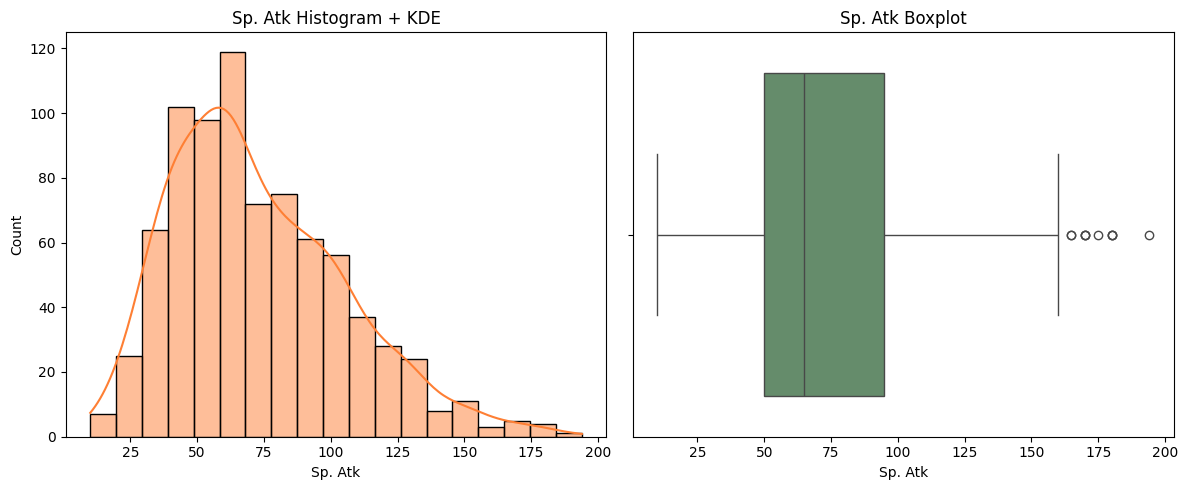

In [ ]:
# Skewness hesapla
skewness = df['Sp. Atk'].skew()
print(f"Sp. Atk sütununun skewness değeri: {skewness:.4f}")

# Grafik alanı oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Sp. Atk'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Sp. Atk Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Sp. Atk'], ax=axes[1], color='#5f9266')
axes[1].set_title('Sp. Atk Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Sp. Atk (Özel Saldırı) Dağılım Analizi**


---

Sol tarafta histogram ve KDE grafiği ile Sp. Atk (Özel Saldırı) değerlerinin dağılımı, sağ tarafta ise boxplot ile özet istatistikler gösterilmiştir.


**Histogram ve KDE Analizi**

- Sp. Atk değerlerinin dağılımı, yaklaşık 60-70 aralığında en yüksek frekansa sahip olup bu aralıkta yaklaşık 120 Pokemon bulunmaktadır. Bu, özel savunmaya göre biraz daha yoğun bir yığılma göstermektedir.  
- 100'ün üzerindeki özel saldırı değerlerine sahip Pokemon sayısı giderek azalmakta, 150'nin üzerinde ise oldukça nadir hale gelmektedir.  

- KDE eğrisi, yaklaşık 55-60 aralığında tepe noktasına ulaştıktan sonra sağa doğru uzun bir kuyruk oluşturarak yavaşça azalmaktadır. Bu durum, dağılımın sağa çarpık karakterini net bir şekilde ortaya koymaktadır.

**Skewness (Çarpıklık) Analizi**

Skewness değeri 0.7447 olup, dağılımın orta derecede sağa çarpık olduğunu göstermektedir.

**Boxplot Detaylı Analizi**
- Minimum değer: 0 ile 25 arasında, sıfıra oldukça yakın.  
- Bieinci Çeyrek (Q1 - %25'lik dilim): Yaklaşık 50 civarında, kutunun alt sınırını oluşturuyor.  
- Medyan (Q2 - %50'lik dilim): Yaklaşık 65 civarında, kutu içindeki kalın çizgi ile gösteriliyor.  
- Üçüncü Çeyrek (Q3 - %75'lik dilim): Yaklaşık 100 civarında, kutunun üst sınırını oluşturuyor.   
- Maksimum değer: Yaklaşık 165 civarında.  
- Aykırı Değerler (Outliers): Yaklaşık 165'in üzerinde 5 adet belirgin aykırı veri bulunmaktadır.  

Sonuç olarak Boxplot'ta kutunun üst kısmının alt kısmından daha geniş olması, yüksek değerler tarafında daha fazla varyasyon olduğunu işaret etmekte ve bu da sağa çarpıklığı desteklemektedir.

Sp. Def sütununun skewness değeri: 0.8540


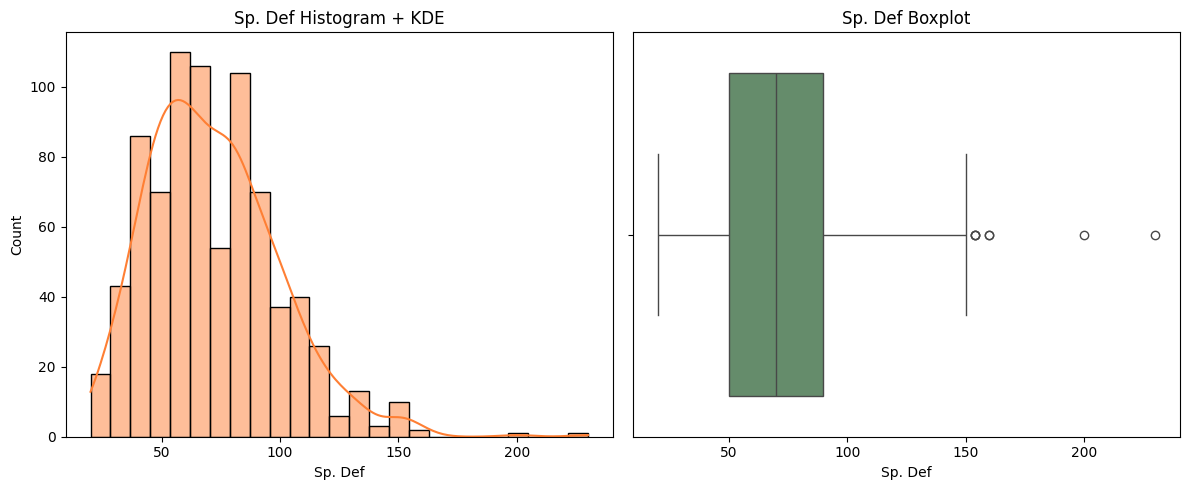

In [ ]:
# Skewness hesapla
skewness = df['Sp. Def'].skew()
print(f"Sp. Def sütununun skewness değeri: {skewness:.4f}")

# Grafik alanı oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Sp. Def'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Sp. Def Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Sp. Def'], ax=axes[1], color='#5f9266')
axes[1].set_title('Sp. Def Boxplot')

plt.tight_layout()
plt.show()

**Pokemon Veri Setinde Sp. Def (Özel Savunma) Dağılım Analizi**


---



Sol tarafta histogram ve KDE grafiği ile Özel Savunma (Sp. Def) değerlerinin dağılımı, sağ tarafta ise boxplot ile özet istatistikler gösterilmiştir.

**Histogram ve KDE Analizi**

- Sp. Def değerlerinin dağılımı, 50-60 aralığında en yüksek frekansa sahiptir ve bu aralıkta yaklaşık 100'ün üzerinde Pokemon bulunmaktadır.
- 150'nin üzerindeki özel savunma değerlerine sahip Pokemon sayısı oldukça azdır; 200'ün üzerinde ise neredeyse hiç Pokemon yoktur.
- KDE eğrisi, yaklaşık 50-60 aralığında tepe noktasına ulaşmakta ve ardından sağa doğru uzun bir kuyruk oluşturarak yavaşça azalmaktadır. Buradan da sağa çarpıklık yorumu yapabiliriz..

**Skewness (Çarpıklık) Analizi**
- Skewness değeri 0.8540 olup, dağılımın orta derecede sağa çarpık olduğunu göstermektedir. Bu değerde grafikten çıkarılan sağa çarpıklık belirgin şekilde görülmektedir.

**Boxplot Detaylı Analizi**
- Minimum değer: 0 ile 50 arasında, sıfıra oldukça yakın.
- Birinci Çeyrek (Q1 - %25'lik dilim): Yaklaşık 50 civarında, kutunun alt sınırını oluşturuyor.
- Medyan (Q2 - %50'lik dilim): Yaklaşık 70 civarında, kutu içindeki kalın çizgi ile gösteriliyor.
- Üçüncü Çeyrek (Q3 - %75'lik dilim): Yaklaşık 90 civarında, kutunun üst sınırını oluşturuyor.
- Maksimum değer: Yaklaşık 150 civarında.
- Aykırı Değerler (Outliers): 150'nin üzerindeki hız değerlerinde 4 adet belirgin aykırı veri bulunmaktadır.

Sonuç olarak kutunun alt ve üst sınırları (Q1 ve Q3) medyan çizgisinden yaklaşık olarak eşit uzaklıktadır; bu da verinin orta kısmında simetrik bir dağılım olduğunu gösterir.

Speed sütununun skewness değeri: 0.3579


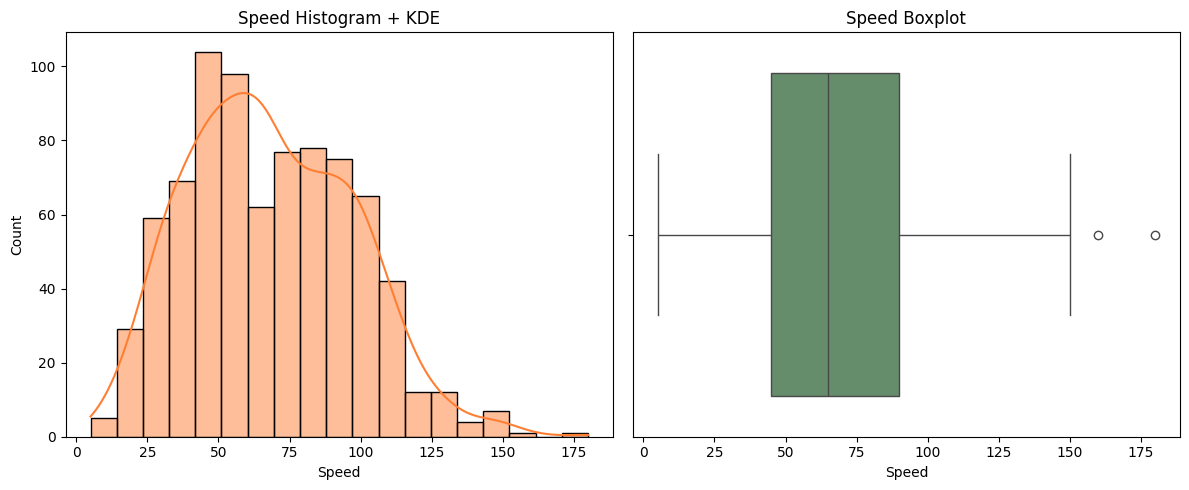

In [ ]:
# Skewness hesapla
skewness = df['Speed'].skew()
print(f"Speed sütununun skewness değeri: {skewness:.4f}")

# Grafik alanı oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histplot + KDE
sns.histplot(df['Speed'], kde=True, ax=axes[0], color='#fe7f34')
axes[0].set_title('Speed Histogram + KDE')

# Boxplot
sns.boxplot(x=df['Speed'], ax=axes[1], color='#5f9266')
axes[1].set_title('Speed Boxplot')

plt.tight_layout()
plt.show()

**Speed (Hız) Dağılımı Analizi**


---
Sol tarafta histogram ve KDE grafiği ile Speed (Hız) değerlerinin dağılımı, sağ tarafta ise boxplot ile özet istatistikler gösterilmiştir.


**Histogram ve KDE Grafiği**

- Speed değerlerinin dağılımı, yaklaşık olarak 50 civarında en yüksek frekansa sahiptir. Bu aralıklarda her biri 100'e yakın ya da 100'ün üzerinde Pokemon sayısı bulunmaktadır.

- 150'nin üzerindeki hız değerlerine sahip Pokemon sayısı oldukça düşüktür ve neredeyse sıfıra yakındır.

- KDE eğrisi, yaklaşık 60 civarında tepe noktasına ulaşmakta ve sonrasında sağa doğru yavaş yavaş azalarak sağa çarpık bir dağılım göstermektedir.

**Skewness (Çarpıklık) Analizi**

Hesaplanan skewness değeri 0.3579 olup, dağılımın hafif sağa çarpık olduğunu göstermektedir. Bu durum, çoğu Pokemonun düşük-orta hız değerlerine sahip olduğunu, az sayıda Pokemonun ise çok yüksek hız değerlerine sahip olduğunu ifade eder.

**Boxplot Analizi**
- Minimum değer: 0 ile 25 arasında, sıfıra oldukça yakın.
- Birinci Çeyrek (Q1 - %25'lik dilim): Yaklaşık 45 civarında, kutunun alt sınırı.  
- Medyan (Q2 - %50'lik dilim): Yaklaşık 65 civarında, kutu içindeki kalın çizgi ile gösteriliyor.  
- Üçüncü Çeyrek (Q3 - %75'lik dilim): Yaklaşık 90 civarında, kutunun üst sınırı.  
- Maksimum değer: Yaklaşık 150 civarında.
- Aykırı değerler: 150'nin üzerindeki hız değerlerinde 2 adet belirgin aykırı veri bulunmaktadır.
  
Ayrıca medyan çizgisi ile üst(3.) çeyrek arasındaki genişlik, medyan çizgisi ile alt(1.) çeyreklik arasındaki genişlikten fazladır. Bu durum, hız değerlerinin medyanın üstünde daha fazla çeşitlilik ve yayılım gösterdiğini ifade eder.  Yani, orta hızın üzerindeki hızlar daha geniş bir skalada dağılmıştır.


# **2.  Veri Ön işleme**

## **2.1. Eksik Değer Analizi**

### 2.1.1. Eksik Veri Olan Sütunlar

In [ ]:
df.isnull().sum() #eksik olan sütunları inceleme

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Sadece Type 2	sütunumuda 386 eksik değerimiz olduğunu görüyoruz..

### 2.1.2. Her Bir Sütun İçin Eksik Oran

In [ ]:
# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = df.isnull().sum() / len(df)

# Yalnızca eksik verisi olan sütunlar
missing_ratio = missing_ratio[missing_ratio > 0]

print(missing_ratio.sort_values(ascending=False))


Type 2    0.4825
dtype: float64


Ve bu eksik değerin oranına baktığımızda %48.25 olduğunu görüyoruz..


### 2.1.3. Eksik Verileri Doldurma

**Nasıl bir yol izleyeceğiz?**
- Pokemonların birinci türü (Type 1) her zaman dolu ama ikinci türü (Type 2) neredeyse yarısında eksik. Bu aslında mantıklı, çünkü pek çok Pokemon sadece bir tipe sahip. (Burada yaklaşık olarak yarısı olduğunu görüyoruz..) Eksik Type 2 değerlerinin olması doğal ve beklenen bir durumdur. Ben Type 2 sütununu analizlerimde kullanacağım için, eksik değerleri None veya No Type gibi bir kategoride gruplayacağım..

In [ ]:
df['Type 2'] = df['Type 2'].fillna('No Type') #eksik değerleri 'No Type' olarak doldurma


In [ ]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


Görüldüğü üzere Type 2 sütunundaki eksik değerlerim yok oldu..

In [ ]:
df['Type 2'].value_counts()['No Type'] # 'Type 2' sütununda değeri 'No Type' olan kayıtların sayısını verir.


np.int64(386)

Buradan da görüyoruz ki, doldurma işlememiz başarıyla tamamlanmış. 386 boş değerim vardı, şimdi 386 No Type değerim var..

 ## **2.2.  Gereksiz Sütunların Kaldırılması**

### 2.2.1. Modelleme Açısından Bilgi Taşımayan Değişkenlerin Çıkarılması

In [ ]:
df.drop(columns=['#', 'Name'], inplace=True)

In [ ]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,No Type,309,39,52,43,60,50,65,1,False


- **`#` sütunu** yalnızca Pokemonların veri setindeki sıralamasını ifade eden bir ID numarasıdır. Model açısından anlamsal bir bilgi taşımadığından çıkarılmıştır.
- **`Name` sütunu** görselleştirme ve tanımlama amaçlı kullanılabilir olsa da modelleme için doğrudan anlamlı bir değişken değildir. Ek olarak, isimlerin istatistiksel bir katkı sağlamaması ve modele gürültü ekleme ihtimali nedeniyle çıkarılmıştır.


 ## **2.3. Özellik Mühendisliği**

### 2.3.1. Var Olan Özelliklerden Yeni Özellikler Türetilmesi

In [ ]:
# Özellik mühendisliği

df['Is_Mono_Type'] = (df['Type 2'] == 'No Type').astype(int) # Daha önce Type 2 sütunundaki eksik değerleri "No Type" olarak doldurmuştuk.
# Bu sayede eksik değerleri çıkarmak yerine, tek tip Pokemonları kolayca tespit edebilme şansı elde ettik..
# Şimdi Is_Mono_Type sütunuyla tek tip ve çift tip ayrımını rahatlıkla yapabiliyoruz. Ne işe yaradığını gördük..

df['Attack_Defense_Ratio'] = df['Attack'] / df['Defense'] #Saldırı / Savunma oranı

# HP'nin toplam değere oranı (dayanıklılığın göreceli ölçüsü)
# Bu özellik, Pokemonun toplam gücüne kıyasla ne kadar dayanıklı olduğunu gösterir.
# Yüksek değerler, göreceli olarak daha sağlam bir yapıya işaret eder.
df['HP_to_Total'] = df['HP'] / df['Total']

# Speed ile Attack oranı (hızlı ve güçlü kombinasyon)
# Bu oran, bir Pokemonun hem hızlı hem de güçlü olma yeteneğini ölçer.
# Dövüşlerde önce saldırma ve yüksek hasar verme avantajını temsil eder.
df['Speed_to_Attack'] = df['Speed'] / df['Attack']

# Nesil bazında one-hot encoding yapalım
# Pokemonun hangi nesile ait olduğunu modelin anlayabilmesi için kategorik değişkeni sayısal hale getiriyoruz.
# Böylece farklı nesillerin özellikleri ve güç dengeleri modele yansıtılır.
generation_dummies = pd.get_dummies(df['Generation'], prefix='Gen')

# Orijinal dataframe'e ekleyelim
# One-hot encoding ile oluşturulan nesil sütunlarını orijinal veri setine ekliyoruz.
df = pd.concat([df, generation_dummies], axis=1)

In [ ]:
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Is_Mono_Type,Attack_Defense_Ratio,HP_to_Total,Speed_to_Attack,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6
0,Grass,Poison,318,45,49,49,65,65,45,1,...,0,1.000000,0.141509,0.918367,True,False,False,False,False,False
1,Grass,Poison,405,60,62,63,80,80,60,1,...,0,0.984127,0.148148,0.967742,True,False,False,False,False,False
2,Grass,Poison,525,80,82,83,100,100,80,1,...,0,0.987952,0.152381,0.975610,True,False,False,False,False,False
3,Grass,Poison,625,80,100,123,122,120,80,1,...,0,0.813008,0.128000,0.800000,True,False,False,False,False,False
4,Fire,No Type,309,39,52,43,60,50,65,1,...,1,1.209302,0.126214,1.250000,True,False,False,False,False,False


 ## **2.4.  Aykırı Değer Analizi**

Yukarıdaki görselleştirme aşamamımızda aykırı değerlerimiz olduğunu görmüştük şimdi onlara birde IQR yöntemi ile bakalım..

### 2.4.1. IQR Yöntemine Göre Aykırı Değerleri Tespit Etme

In [ ]:
# Sadece sayısal veri tipine sahip sütunları seçiyoruz
numeric_cols = df.select_dtypes(include='number').columns

# Her bir sayısal sütun için döngü başlatıyoruz
for col in numeric_cols:

    # 1. çeyrek değer (Q1): Verinin %25'i bu değerin altında
    Q1 = df[col].quantile(0.25)

    # 3. çeyrek değer (Q3): Verinin %75'i bu değerin altında
    Q3 = df[col].quantile(0.75)

    # IQR (Interquartile Range): Q3 - Q1 → orta %50'lik aralık
    IQR = Q3 - Q1

    # Aykırı değer alt sınırı: Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Aykırı değer üst sınırı: Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtreleme: alt sınırdan küçük veya üst sınırdan büyük olanlar
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Eğer aykırı değer varsa (outliers boş değilse)
    if not outliers.empty:
        # Hangi sütunda aykırı değer bulunduğunu yazdır
        print(f"\n - Aykırı değerler - {col} sütunu:")

        # Sadece o sütundaki aykırı değerleri yazdır
        print(outliers[[col]])




 - Aykırı değerler - HP sütunu:
      HP
45   140
121  250
142  130
145  130
155  160
217  190
261  255
313  150
316    1
321  144
350  130
351  170
473  150
495  135
544  150
545  150
655  165
792  126
793  126

 - Aykırı değerler - Attack sütunu:
     Attack
163     190
232     185
424     180
426     180
429     180
494     170
711     170

 - Aykırı değerler - Defense sütunu:
     Defense
87       180
98       180
103      160
223      200
224      230
230      230
332      180
333      230
414      200
424      160
430      160
456      168
789      184

 - Aykırı değerler - Sp. Atk sütunu:
     Sp. Atk
71       175
102      170
164      194
196      165
306      165
422      180
426      180
429      180
712      170
798      170

 - Aykırı değerler - Sp. Def sütunu:
     Sp. Def
230      230
269      154
270      154
415      200
422      160
430      160
739      154

 - Aykırı değerler - Speed sütunu:
     Speed
315    160
431    180

 - Aykırı değerler - Attack_Defense_Ratio

Veri setimizde bazı sütunlarda aykırı değerler olduğu görselleştirme adımında olduğu gibi burada da görülmektedir. Bu değerler, analiz ve modelleme sürecinde dikkate alınmalıdır:

- HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Attack_Defense_Ratio, HP_to_Total, Speed_to_Attack

Bu sütunlardaki uç değerler, veri dağılımını etkileyebilir. Gerekliliğibe göre temizleme veya dönüştürme işlemleri uygulanmalıdır..

 ## **2.5.  Aykırı Değer İşleme**

🎯**Hedef Değişken ve Önemli Özellikler**


---


Bu çalışmada Pokemon veri seti kullanılmıştır. Veri setindeki temel amaç, bir Pokemonun "Legendary" (efsanevi) olup olmadığını tahmin etmektir. Bu nedenle Legendary sütunu hedef değişken olarak belirlenmiştir.

Modellemeye katkı sağlayabilecek, Pokemonun savaş gücünü ve genel performansını yansıtan bazı sayısal değişkenler özellikle önem arz etmektedir. Bunlar:

- HP, Attack, Defense, Sp. Atk, Sp. Def, Speed ve bu değişkenlerden türetilmiş oranlar olan Attack_Defense_Ratio, HP_to_Total, Speed_to_Attack

Bu değişkenler, Pokemonun güç profiline dair doğrudan bilgi sunduğu için, modelin Legendary sınıflandırmasını öğrenmesinde kritik rol oynar. Aykırı değerler bu nedenle dikkatle analiz edilmiş ve veri setinde tutularak uygun dönüşümlere tabi tutulmuştur.

### 2.5.1. Aykırı Değerleri Baskılama

In [ ]:
print(f"HP sütununun skewness değeri: {df['HP'].skew():.4f}")
print(f"Attack sütununun skewness değeri: {df['Attack'].skew():.4f}")
print(f"Defense sütununun skewness değeri: {df['Defense'].skew():.4f}")
print(f"Sp. Atk sütununun skewness değeri: {df['Sp. Atk'].skew():.4f}")
print(f"Sp. Def sütununun skewness değeri: {df['Sp. Def'].skew():.4f}")
print(f"Speed sütununun skewness değeri: {df['Speed'].skew():.4f}")
print(f"Attack_Defense_Ratio sütununun skewness değeri: {df['Attack_Defense_Ratio'].skew():.4f}")
print(f"HP_to_Total sütununun skewness değeri: {df['HP_to_Total'].skew():.4f}")
print(f"Speed_to_Attack sütununun skewness değeri: {df['Speed_to_Attack'].skew():.4f}")


HP sütununun skewness değeri: 1.5682
Attack sütununun skewness değeri: 0.5516
Defense sütununun skewness değeri: 1.1559
Sp. Atk sütununun skewness değeri: 0.7447
Sp. Def sütununun skewness değeri: 0.8540
Speed sütununun skewness değeri: 0.3579
Attack_Defense_Ratio sütununun skewness değeri: 4.3953
HP_to_Total sütununun skewness değeri: 2.5022
Speed_to_Attack sütununun skewness değeri: 5.4867


**📊 Skewness (Çarpıklık) Analizi**


---
Bu değerler, özellikle Attack_Defense_Ratio, Speed_to_Attack, HP_to_Total, HP ve Defense gibi sütunlarda sağa çarpıklık (pozitif skewness) olduğunu göstermektedir. Diğer sütunlarda da az veya orta düzeyde sağa çarpıklık mevcuttur. Bu durum, verilerin simetrik bir dağılım göstermediğini ve modelleme aşamasında bu çarpıklığın dikkate alınması gerektiğini ortaya koyar.

**🔄 Dönüşüm Yaklaşımları**


---


Çarpık dağılımlı verilerde ilk akla gelen dönüşüm yöntemlerinden biri logaritmik (log) dönüşümdür. Log dönüşümü özellikle sağa çarpık verilerde etkili olabilir; çünkü yüksek değerleri sıkıştırarak verinin daha simetrik hale gelmesini sağlar. Bu nedenle, sağa çarpıklık gösteren sütunlarda ilk olarak log dönüşümü uygulanacaktır..


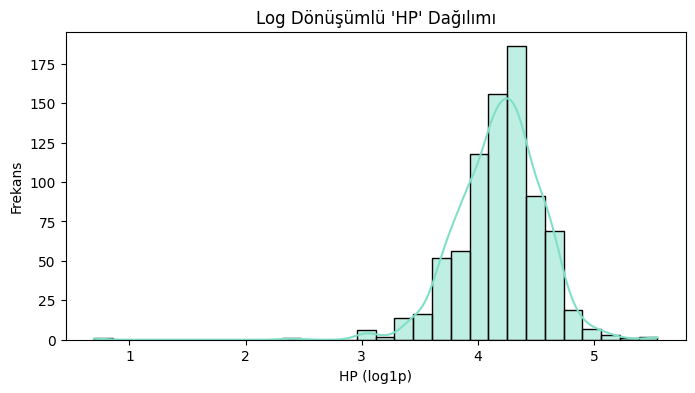

HP sütunu - Log dönüşüm sonrası çarpıklık: -1.2292


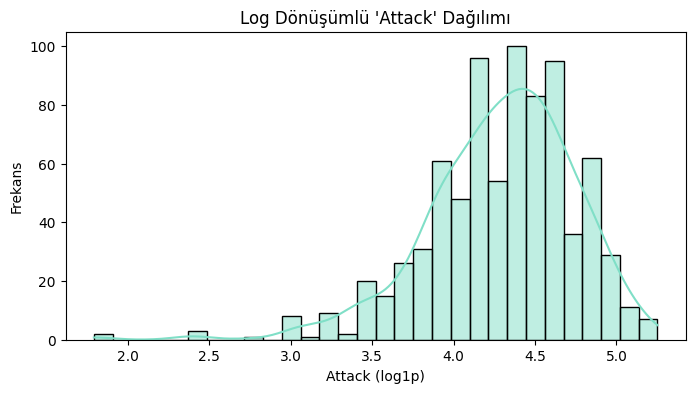

Attack sütunu - Log dönüşüm sonrası çarpıklık: -0.9993


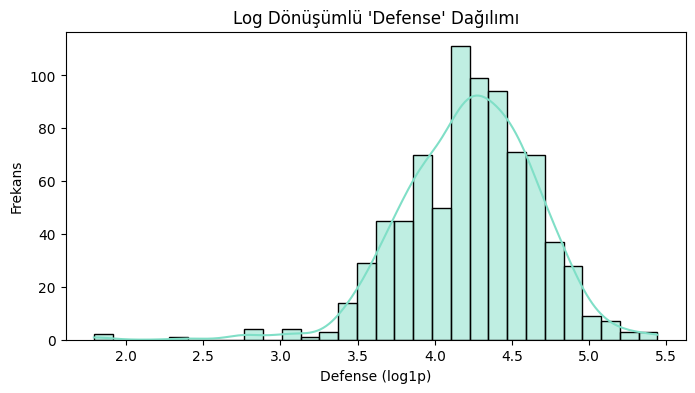

Defense sütunu - Log dönüşüm sonrası çarpıklık: -0.6924


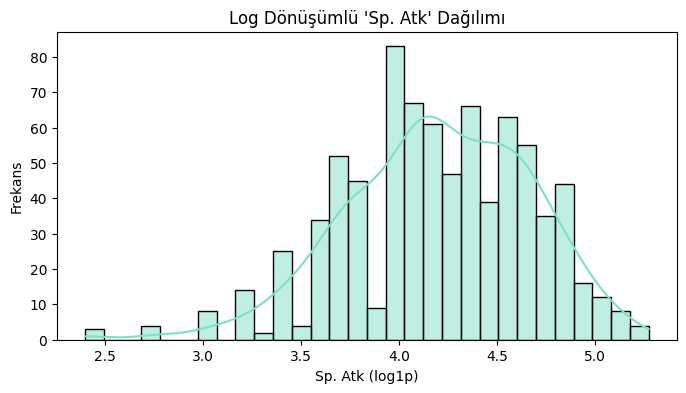

Sp. Atk sütunu - Log dönüşüm sonrası çarpıklık: -0.4429


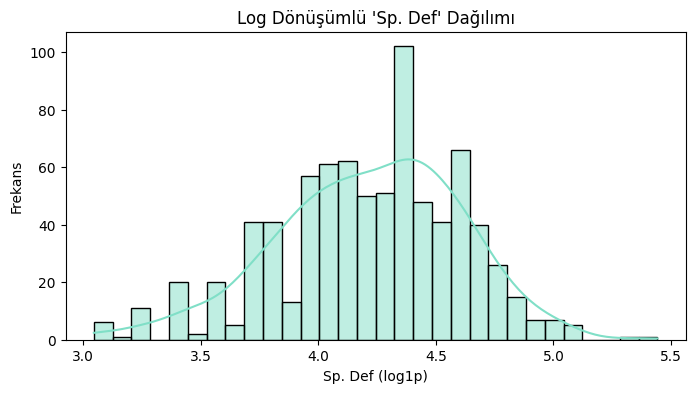

Sp. Def sütunu - Log dönüşüm sonrası çarpıklık: -0.3277


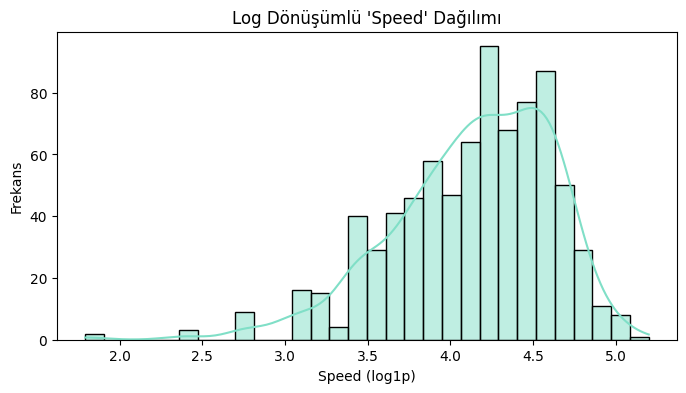

Speed sütunu - Log dönüşüm sonrası çarpıklık: -0.9019


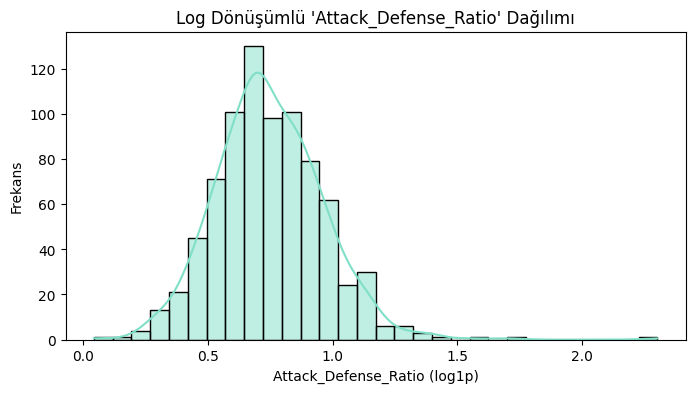

Attack_Defense_Ratio sütunu - Log dönüşüm sonrası çarpıklık: 0.7302


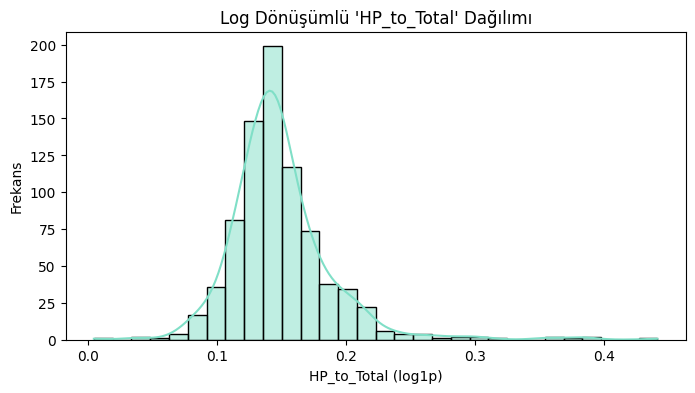

HP_to_Total sütunu - Log dönüşüm sonrası çarpıklık: 2.0047


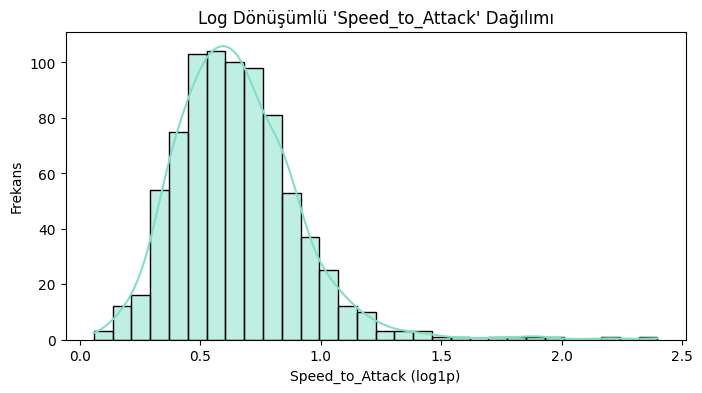

Speed_to_Attack sütunu - Log dönüşüm sonrası çarpıklık: 1.4401


In [ ]:
# Aykırılık barındıran sütunlar
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Attack_Defense_Ratio', 'HP_to_Total', 'Speed_to_Attack']

for col in columns:
    # Log1p dönüşüm
    transformed = np.log1p(df[col])

    # Histogram ve KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed, bins=30, kde=True, color="#80dfc7")
    plt.title(f"Log Dönüşümlü '{col}' Dağılımı")
    plt.xlabel(f"{col} (log1p)")
    plt.ylabel("Frekans")
    plt.show()

    # Yeni çarpıklık
    new_skew = skew(transformed)
    print(f"{col} sütunu - Log dönüşüm sonrası çarpıklık: {new_skew:.4f}")

**📉 Log Dönüşüm Sonrası Çarpıklık Analizi**


---


Veri setinde sağa çarpıklık (pozitif skewness) gösteren sütunlara log1p dönüşümü uygulandıktan sonra elde edilen çarpıklık değerleri aşağıda verilmiştir:

- HP sütunu: -1.2292

- Attack sütunu: -0.9993

- Defense sütunu: -0.6924

- Sp. Atk sütunu: -0.4429

- Sp. Def sütunu: -0.3277

- Speed sütunu: -0.9019

- Attack_Defense_Ratio sütunu 0.7302  → özellik müh. ile oluşturuldu..  
- HP_to_Total sütunu: 2.0047 → özellik müh. ile oluşturuldu..
- Speed_to_Attack sütunu: 1.4401  → özellik müh. ile oluşturuldu..

Görüldüğü üzere, log dönüşümü sonrası var olan tüm sütunlarda aşırı sola çarpıklık (negatif skewness) oluşmuştur. Bu durum, log dönüşümünün çarpıklığı azaltmakla birlikte dağılımı simetrik hale getirmekte yetersiz kaldığını ve hatta fazla ters yönde bozduğunu göstermektedir. Özellik müh. ile oluşturulan sütunlarda ise; Başlangıçta, özelliklerin dağılımlarındaki yüksek pozitif çarpıklığı azaltmak için log dönüşümü denendi. Log dönüşüm bazı sütunlarda (örneğin `Attack_Defense_Ratio`) çarpıklığı azalttı ancak bazı sütunlarda (`HP_to_Total`) istenilen düzeyde çarpıklık azalmadı.

**🔄 Alternatif Dönüşüm: Box-Cox**


---


Bu nedenle, daha esnek bir dönüşüm yöntemi olan Box-Cox dönüşümü denenmiştir. Box-Cox dönüşümü, parametreye bağlı olarak hem sağa hem de sola çarpıklığı azaltabilen ve veriyi normalize etmeye daha yatkın bir yöntemdir. Sadece pozitif değerlerde uygulanabilir olması dışında, çarpıklığı dengeleme konusunda log dönüşümüne göre daha güçlü bir alternatiftir.

Bir sonraki adımda, Box-Cox dönüşümünün bu sütunlar üzerindeki etkisi incelenecektir.



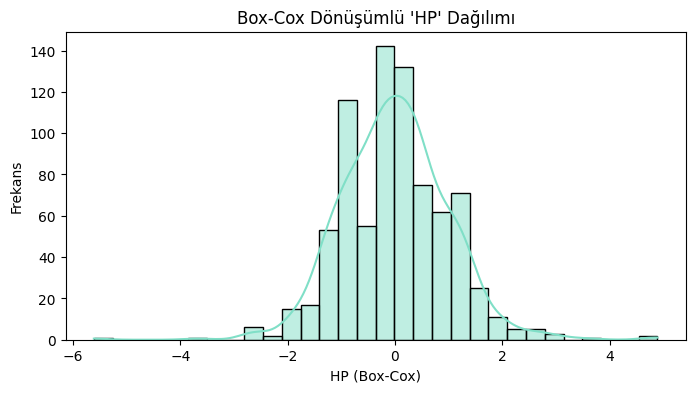

HP sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.1477


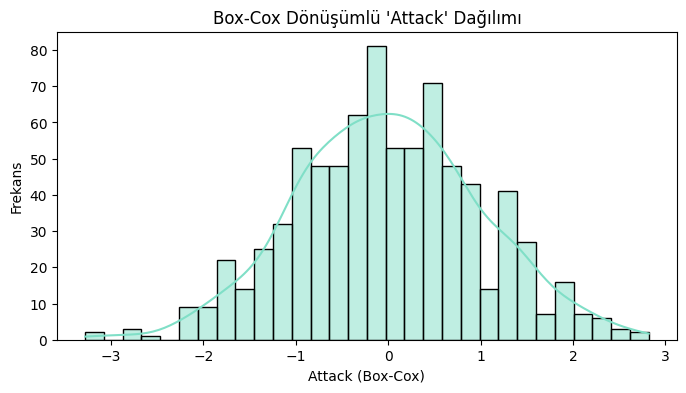

Attack sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.0065


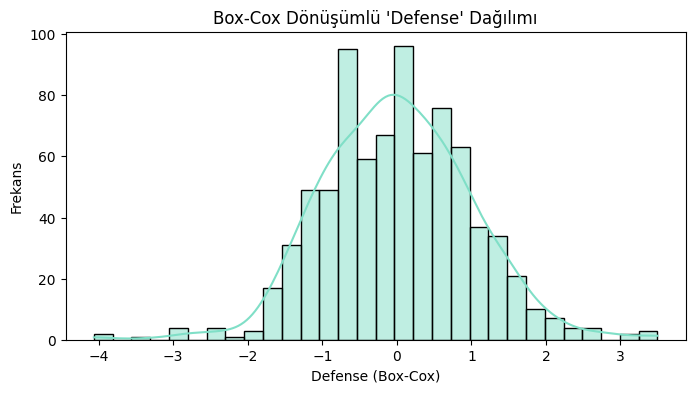

Defense sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.0505


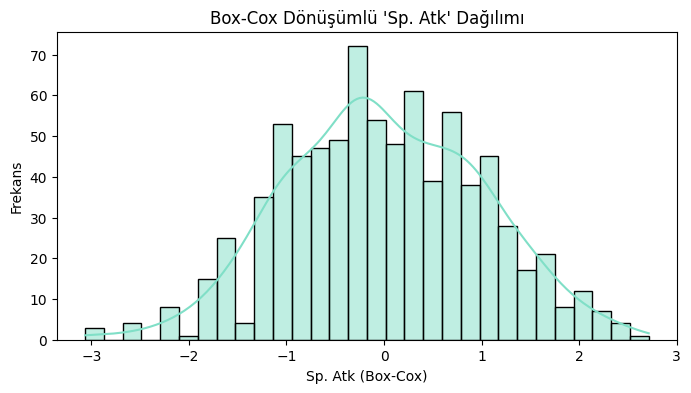

Sp. Atk sütunu - Box-Cox dönüşüm sonrası çarpıklık: -0.0110


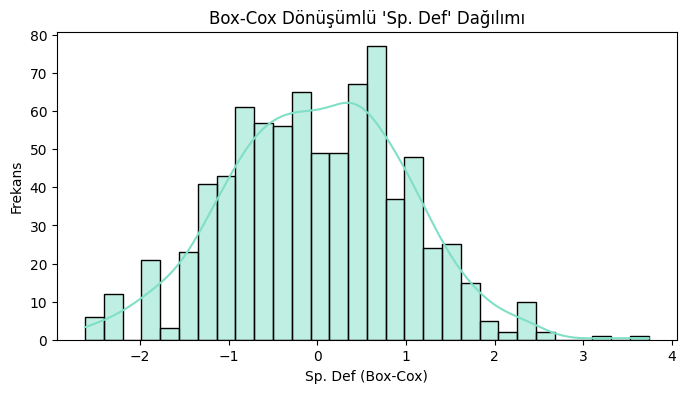

Sp. Def sütunu - Box-Cox dönüşüm sonrası çarpıklık: -0.0033


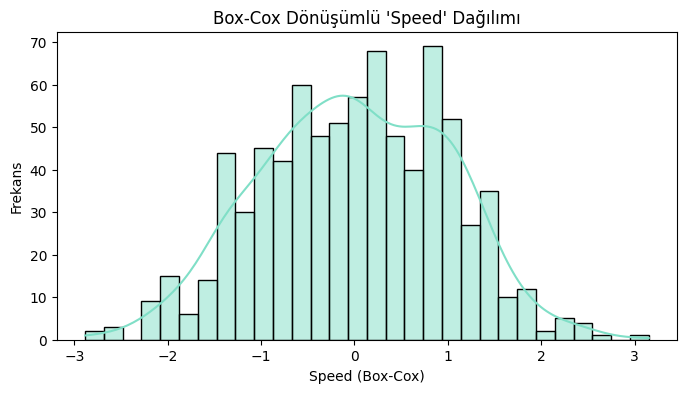

Speed sütunu - Box-Cox dönüşüm sonrası çarpıklık: -0.0455


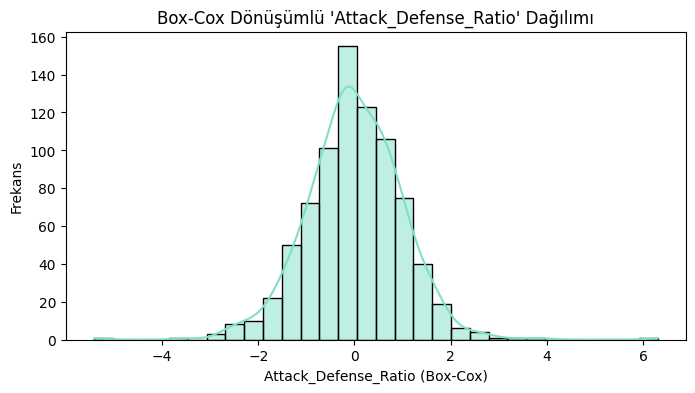

Attack_Defense_Ratio sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.0919


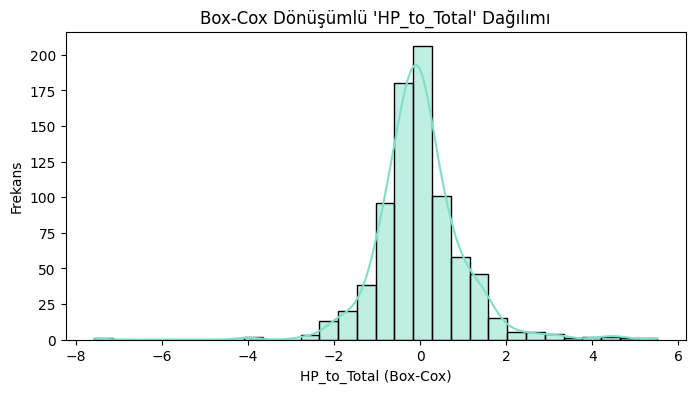

HP_to_Total sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.2886


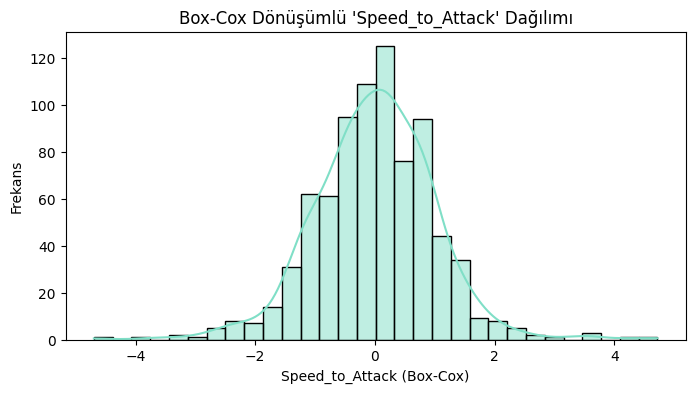

Speed_to_Attack sütunu - Box-Cox dönüşüm sonrası çarpıklık: 0.0137


In [ ]:
# Aykırılık barındıran sütunlar
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Attack_Defense_Ratio', 'HP_to_Total', 'Speed_to_Attack']

for col in columns:

    # Box-Cox dönüşüm (sadece pozitif değerler için uygundur)
    data = df[col].values.reshape(-1, 1)

    # Box-Cox dönüşüm
    pt_boxcox = PowerTransformer(method='box-cox')
    transformed = pt_boxcox.fit_transform(data).flatten()

    # Histogram ve KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed, bins=30, kde=True, color="#80dfc7")
    plt.title(f"Box-Cox Dönüşümlü '{col}' Dağılımı")
    plt.xlabel(f"{col} (Box-Cox)")
    plt.ylabel("Frekans")
    plt.show()

    # Yeni çarpıklık
    new_skew = skew(transformed)
    print(f"{col} sütunu - Box-Cox dönüşüm sonrası çarpıklık: {new_skew:.4f}")

**📌 Box-Cox Dönüşümü ile Çarpıklık Azaltma**


---



Log dönüşümü uygulandığında birçok sütunun dağılımı sola çarpık hale gelmişti. Bu durum, istatistiksel analiz ve modelleme süreçlerinde doğrusal varsayımların bozulmasına neden olabilir.  
Bu nedenle, yalnızca pozitif değerlerde uygulanabilen ve dağılımları normale yaklaştırma konusunda oldukça başarılı olan **Box-Cox dönüşümü** tercih edilmiştir.

Aşağıda, her sütun için Box-Cox dönüşümünden **önceki ve sonraki çarpıklık (skewness)** değerleri karşılaştırmalı olarak verilmiştir:

| Sütun               | Orijinal Skewness | Box-Cox Sonrası Skewness |
|---------------------|-------------------|--------------------------|
| HP                  | 1.5682            | 0.1477                   |
| Attack              | 0.5516            | 0.0065                   |
| Defense             | 1.1559            | 0.0505                   |
| Sp. Atk             | 0.7447            | -0.0110                  |
| Sp. Def             | 0.8540            | -0.0033                  |
| Speed               | 0.3579            | -0.0455                  |
| Attack_Defense_Ratio | 4.3953            | 0.0919                  |
| HP_to_Total         | 2.5022            | 0.2886                   |
| Speed_to_Attack     | 5.4867            | 0.0137                   |


🔍 **Yorum:**  
Box-Cox dönüşümü, tüm sütunlardaki çarpıklık değerlerini büyük ölçüde azaltarak dağılımları daha simetrik hale getirmiştir. Bu sayede, özellikle regresyon gibi parametrik yöntemlerde daha güvenilir ve anlamlı sonuçlar elde edilebilir.

Özellik müh. ile oluşturduğumuz sütunlara bakarsak ise Box-Cox dönüşümü, log dönüşümüne göre bu 3 sütundaki çarpıklığı çok daha iyi azalttı. Log dönüşüm bazı sütunlarda hala yüksek çarpıklık bırakırken, Box-Cox simetrik ve dengeli dağılım sağladı. Bu sayede özellikler modele daha uygun hale geldi ve performans artışı beklenir.


 ## **2.6.  Kategorik Verileri Kodlama**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type 1                800 non-null    object 
 1   Type 2                800 non-null    object 
 2   Total                 800 non-null    int64  
 3   HP                    800 non-null    int64  
 4   Attack                800 non-null    int64  
 5   Defense               800 non-null    int64  
 6   Sp. Atk               800 non-null    int64  
 7   Sp. Def               800 non-null    int64  
 8   Speed                 800 non-null    int64  
 9   Generation            800 non-null    int64  
 10  Legendary             800 non-null    bool   
 11  Is_Mono_Type          800 non-null    int64  
 12  Attack_Defense_Ratio  800 non-null    float64
 13  HP_to_Total           800 non-null    float64
 14  Speed_to_Attack       800 non-null    float64
 15  Gen_1                 8

**Kategorik Değişkenlerin İşlenmesi**


---



Veri setimizde bulunan ve kategorik olarak işlenmesi gereken değişkenler şunlardır:

- **Type 1** (object): Pokemonun birinci türü  
- **Type 2** (object): İkinci tür (varsa)  
- **Legendary** (bool): Efsanevi olup olmadığı  

Bu değişkenler modelleme aşamasında sayısal forma dönüştürülmelidir.

- **Type 1** ve **Type 2** gibi birden çok kategori içeren sütunlar için **One-Hot Encoding** kullanılır.  
  Çünkü bu değişkenlerin kategorileri arasında herhangi bir sıralama veya büyüklük ilişkisi yoktur.  
  One-Hot Encoding ile her kategori ayrı sütuna dönüştürülür ve modelin yanlış sıralama algılamasının önüne geçilir.

- **Legendary** sütunu ise bool (True/False) olduğu için doğrudan **Label Encoding** (True → 1, False → 0) ile sayısal hale getirilmesi uygundur.  
  Bu durumda değerler zaten ikili olduğu için One-Hot’a gerek yoktur.




### 2.6.1. `Legendary`: LabelEncoder

In [ ]:
le = LabelEncoder()
df['legendary_label'] = le.fit_transform(df['Legendary']) # 'Legendary' sütunundaki kategorik verileri sayısal etiketlere dönüştürerek 'legendary_label' adlı yeni sütun oluşturuyoruz..

In [ ]:
df.head(1000)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Attack_Defense_Ratio,HP_to_Total,Speed_to_Attack,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,legendary_label
0,Grass,Poison,318,45,49,49,65,65,45,1,...,1.000000,0.141509,0.918367,True,False,False,False,False,False,0
1,Grass,Poison,405,60,62,63,80,80,60,1,...,0.984127,0.148148,0.967742,True,False,False,False,False,False,0
2,Grass,Poison,525,80,82,83,100,100,80,1,...,0.987952,0.152381,0.975610,True,False,False,False,False,False,0
3,Grass,Poison,625,80,100,123,122,120,80,1,...,0.813008,0.128000,0.800000,True,False,False,False,False,False,0
4,Fire,No Type,309,39,52,43,60,50,65,1,...,1.209302,0.126214,1.250000,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,...,0.666667,0.083333,0.500000,False,False,False,False,False,True,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,...,1.454545,0.071429,0.687500,False,False,False,False,False,True,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,...,1.833333,0.133333,0.636364,False,False,False,False,False,True,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,...,2.666667,0.117647,0.500000,False,False,False,False,False,True,1


Görüldüğü üzere, Label Encoder kullanarak Legendary sütunundaki kategorik değerleri sayısal değerlere dönüştürdük. Bu dönüşüm sonucunda False değeri 0, True değeri ise 1 olarak kodlanmıştır.

### 2.6.2. `Type 1` ve `Type 2`: One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Type 1'], drop_first=True) # 'Type 1' sütunundaki kategorik değişkeni one-hot encoding yöntemiyle dönüştürüp
#ilk kategoriyi referans almak için drop_first=True ile birinci sütunu çıkarıyoruz..

In [ ]:
df.head()

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,Poison,318,45,49,49,65,65,45,1,False,...,False,True,False,False,False,False,False,False,False,False
1,Poison,405,60,62,63,80,80,60,1,False,...,False,True,False,False,False,False,False,False,False,False
2,Poison,525,80,82,83,100,100,80,1,False,...,False,True,False,False,False,False,False,False,False,False
3,Poison,625,80,100,123,122,120,80,1,False,...,False,True,False,False,False,False,False,False,False,False
4,No Type,309,39,52,43,60,50,65,1,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = pd.get_dummies(df, columns=['Type 2'], drop_first=True) # 'Type 2' sütunundaki kategorik değişkeni one-hot encoding yöntemiyle dönüştürüp
#ilk kategoriyi referans almak için drop_first=True ile birinci sütunu çıkarıyoruz..

In [ ]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Is_Mono_Type,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_No Type,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,1,False,0,...,False,False,False,False,False,True,False,False,False,False
1,405,60,62,63,80,80,60,1,False,0,...,False,False,False,False,False,True,False,False,False,False
2,525,80,82,83,100,100,80,1,False,0,...,False,False,False,False,False,True,False,False,False,False
3,625,80,100,123,122,120,80,1,False,0,...,False,False,False,False,False,True,False,False,False,False
4,309,39,52,43,60,50,65,1,False,1,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total                 800 non-null    int64  
 1   HP                    800 non-null    int64  
 2   Attack                800 non-null    int64  
 3   Defense               800 non-null    int64  
 4   Sp. Atk               800 non-null    int64  
 5   Sp. Def               800 non-null    int64  
 6   Speed                 800 non-null    int64  
 7   Generation            800 non-null    int64  
 8   Legendary             800 non-null    bool   
 9   Is_Mono_Type          800 non-null    int64  
 10  Attack_Defense_Ratio  800 non-null    float64
 11  HP_to_Total           800 non-null    float64
 12  Speed_to_Attack       800 non-null    float64
 13  Gen_1                 800 non-null    bool   
 14  Gen_2                 800 non-null    bool   
 15  Gen_3                 8

**One-Hot Encoding Sonrası Sütunlar**

One-Hot Encoding uygulandıktan sonra, kategorik değişkenler her kategori için ayrı sütunlara dönüştürülür.  
 **Type 1** ve **Type 2** sütunlarındaki farklı kategoriler, ayrı ayrı yeni sütunlar olarak açılır.

Her satırda ilgili kategoriye karşılık gelen sütunda `True` veya `False` (1 veya 0) değeri bulunur.

Yukarıda görüldüğü üzere de, her kategoriye ait sütunlar oluşturulmuş ve ilgili değerler atanmıştır.

***‼️Dipnot:***

`Generation` sütununa özellik mühendisliği aşamasında one-hot encoding uyguladığımız için bu aşamada encoding'e gerek kalmadı.  

# **3.  Modelleme**

 ## **3.1. Veri Setinin Bölünmesi**

In [ ]:
# Özellikler ve hedef değişkeni ayırma
X = df.drop(['Legendary', 'legendary_label'], axis=1) # Hedef değişkenle ilgili sütunları kaldırarak veri sızıntısını önlüyoruz..
y = df['legendary_label']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ## **3.2. Makine Öğrenmesi Modellerinin Oluşturulması**

In [ ]:
# Modelleri tanımlama
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

 ## **3.3.  Sınıflandırma Modellerinin Eğitilmesi, Değerlendirilmesi ve Karmaşıklık Matrisinin Görselleştirilmesi**


Random Forest Sonuçları:
Doğruluk: 0.9500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.60      0.60      0.60        10

    accuracy                           0.95       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.95      0.95      0.95       160



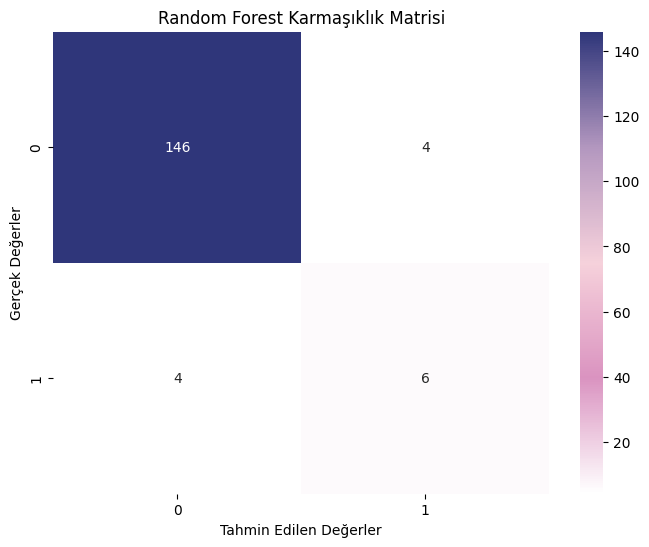


SVM Sonuçları:
Doğruluk: 0.9625

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.83      0.50      0.62        10

    accuracy                           0.96       160
   macro avg       0.90      0.75      0.80       160
weighted avg       0.96      0.96      0.96       160



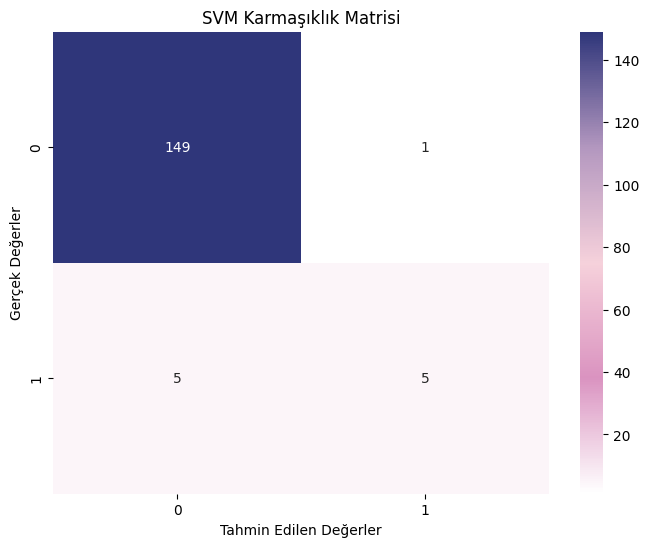


KNN Sonuçları:
Doğruluk: 0.9500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       150
           1       0.75      0.30      0.43        10

    accuracy                           0.95       160
   macro avg       0.85      0.65      0.70       160
weighted avg       0.94      0.95      0.94       160



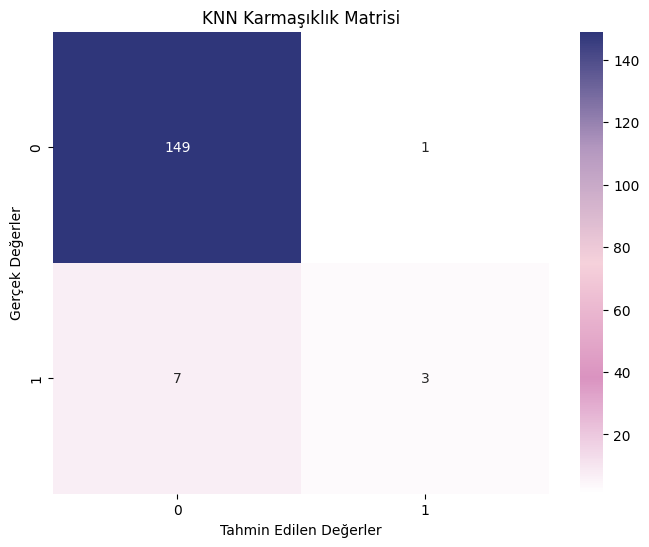


XGBoost Sonuçları:
Doğruluk: 0.9563

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       150
           1       0.60      0.90      0.72        10

    accuracy                           0.96       160
   macro avg       0.80      0.93      0.85       160
weighted avg       0.97      0.96      0.96       160



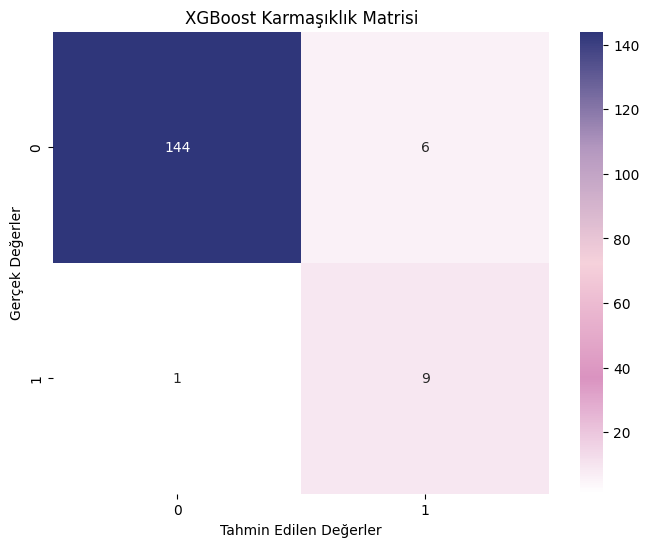


LightGBM Sonuçları:
Doğruluk: 0.9500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.56      0.90      0.69        10

    accuracy                           0.95       160
   macro avg       0.78      0.93      0.83       160
weighted avg       0.97      0.95      0.96       160



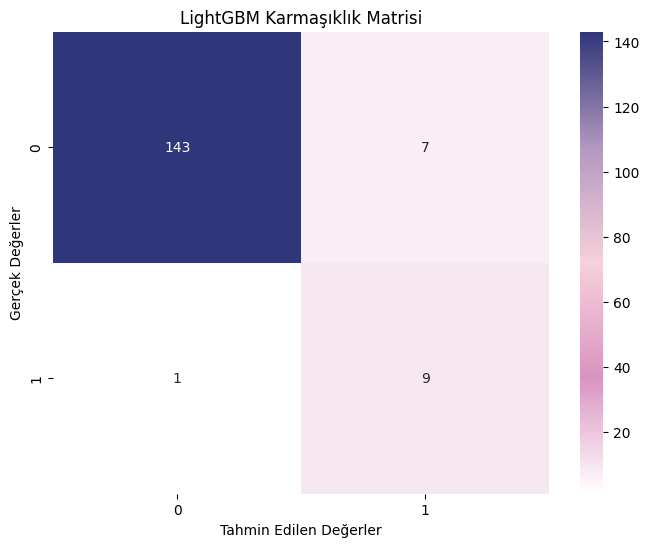


CatBoost Sonuçları:
Doğruluk: 0.9625

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



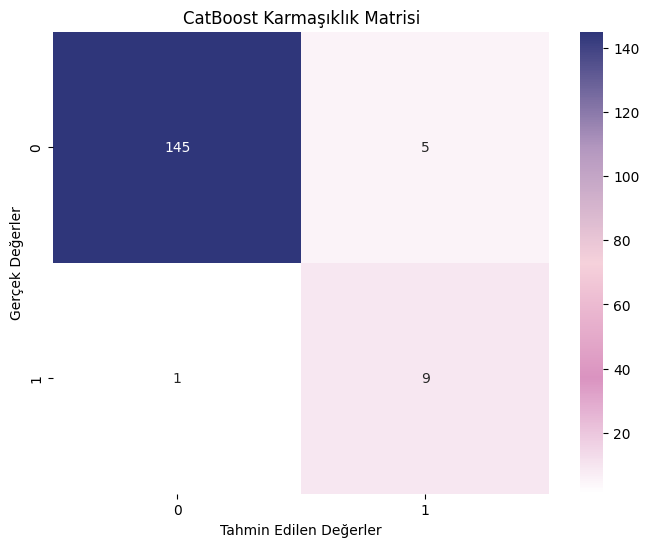

In [ ]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk: {results[name]['accuracy']:.4f}")
    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])


    poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
    confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)


    # Karmaşıklık matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()

**Modellerin Orijinal Veri Üzerindeki Performans Değerlendirmesi**


---


**Confusion Matrix**
- TP (Doğru Pozitif): Pozitif sınıfın doğru tahmini.
- TN (Doğru Negatif): Negatif sınıfın doğru tahmini.
- FP (Yanlış Pozitif): Negatif sınıfın pozitif olarak yanlış tahmini.
- FN (Yanlış Negatif): Pozitif sınıfın negatif olarak yanlış tahmini.

**Random Forest İçin;**

- Bu model, Legendary olmayan 146 örneği doğru bir şekilde sınıflandırmış, Legendary olan 6 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 4 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 4 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.

**SVM İçin;**

- Bu model, Legendary olmayan 149 örneği doğru bir şekilde sınıflandırmış, Legendary olan 5 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 1 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 5 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.

**KNN İçin;**

- Bu model, Legendary olmayan 149 örneği doğru bir şekilde sınıflandırmış, Legendary olan 3 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 1 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 7 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.

**XGBoost İçin;**

- Bu model, Legendary olmayan 144 örneği doğru bir şekilde sınıflandırmış, Legendary olan 9 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 6 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 1 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.

**LightGBM İçin;**

- Bu model, Legendary olmayan 143 örneği doğru bir şekilde sınıflandırmış, Legendary olan 9 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 7 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 1 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.

**CatBoost İçin;**

- Bu model, Legendary olmayan 145 örneği doğru bir şekilde sınıflandırmış, Legendary olan 9 örneği de doğru tahmin etmiştir. Ancak, Legendary olmayan 5 örneği yanlışlıkla Legendary olarak sınıflandırmış ve Legendary olan 1 örneği de Legendary değil şeklinde hatalı sınıflandırmıştır.


**🎯 `Legendary` (1) Sınıfı Performans Analizi**

| Model        | Precision | Recall | F1-Score | Yorum |
|--------------|-----------|--------|----------|-------|
| **Random Forest** | 0.60      | 0.60   | 0.60     | 	Ne doğru tahminlerde yüksek, ne kaçırma oranında düşük. Ortalama düzeyde performans sergiliyor.|
| **SVM**           | 0.83      | 0.50   | 0.62     | 	Yüksek precision ile çok az yanılıyor; ama düşük recall nedeniyle birçok Legendary Pokemonu kaçırıyor. “Seçici” ama “dışlayıcı” bir model. |
| **KNN**           | 0.75      | 0.30   | 0.43     | En düşük performanslı model. Legendary sınıfının çoğunu kaçırıyor. Recall çok düşük. |
| **XGBoost**       | 0.60      | 0.90   | 0.72     | 	Yüksek recall sayesinde neredeyse tüm Legendary Pokemonları buluyor, ama birçok normal Pokémonu da yanlışlıkla Legendary sanıyor. “Hassas ama yanılabilir.” |
| **LightGBM**      | 0.56      | 0.90   | 0.69     | XGBoost’a benzer şekilde recall çok iyi, ama precision düşük. Model Legendary olmayanlara da Legendary diyebiliyor. |
| **CatBoost**      | 0.64      | 0.90   | 0.75     |Hem yüksek recall hem kabul edilebilir precision. Denge açısından en başarılı model. Kaçırmadan doğru tahmin yapmaya en yakın model. F1-score en yüksek olan model. |

---

**📌 Genel Değerlendirme:**

- Eğer amaç **hiçbir Legendary Pokemonu kaçırmamaksa** (**recall öncelikli**):
  ✅ **XGBoost**, **LightGBM**, **CatBoost**

- Eğer **yanlış şekilde Legendary demek büyük bir hata** olacaksa (**precision öncelikli**):
  ✅ **SVM, KNN**

- Eğer **denge isteniyorsa** (hem doğru tahmin oranı hem kaçırmama oranı):
  ✅ **CatBoost**

 **🧱 `Legendary Olmayan (0)` Sınıfı Performans Analizi**

| Model        | Precision | Recall | F1-Score | Yorum |
|--------------|-----------|--------|----------|-------|
| **Random Forest** | 0.97      | 0.97   | 0.97     |Model, Legendary olmayan Pokemonları hem yüksek doğrulukla tanıyor hem de nadiren Legendary ile karıştırıyor. Dengeli bir performansa sahip. |
| **SVM**           | 0.97      | 0.99   | 0.98     |Model, Legendary olmayanları neredeyse hatasız şekilde tanıyor. . |
| **KNN**           | 0.96      | 0.99   | 0.97     | Legendary olmayan sınıfı başarıyla tanıyor. Recall çok yüksek. |
| **XGBoost**       | 0.99      | 0.96   | 0.98     | Precision oldukça yüksek: Model neredeyse hiç yanlış şekilde Legendary dememiş. Recall da güçlü, ancak birkaç Legendary olmayanı kaçırmış. |
| **LightGBM**      | 0.99      | 0.95   | 0.97     |Model Legendary olmayanlara yanlış şekilde Legendary dememekte çok başarılı. Ancak birkaç doğru Legendary olmayanı kaçırabiliyor. |
| **CatBoost**      | 0.99      | 0.97   | 0.98     | Precision ve recall dengeli. Model hem çok az hata yapıyor hem de Legendary olmayanları büyük oranda doğru tanıyor. En güçlü modellerden biri. |

---

📌 **Genel Değerlendirme:**

- Eğer **Legendary olmayanları doğru şekilde ayırmak** önemliyse (**recall öncelikli**):
  ✅ **CatBoost**, **XGBoost**, **SVM** öne çıkıyor.   

**Çünkü; `Sınıf 0`  ve `Sınıf 1` için recall şu anlamlara gelir:**

- `Sınıf 1:`
Gerçekten Legendary olan pokemonları (sınıf 1 ) doğru şekilde Legendary olarak tahmin edebilmek.
- `Sınıf 0:`
Gerçekten Legendary olmayan pokemonları (sınıf 0) doğru şekilde Legendary değil diye tahmin edebilmek.
  



 ## **3.4.   En Başarılı Modelin Belirlenmesi**




### 3.4.1.  Tüm Modellerin Doğruluk Skorlarını Karşılaştırma

**Doğruluk (Accuracy):**
Tüm modeller genel doğruluk açısından oldukça yüksek değerlere (yaklaşık %95 ve üzeri) ulaşmış. Ancak doğruluk, azınlık sınıfın (1) çok az olduğu dengesiz veri setlerinde yanıltıcı olabilir; çünkü çoğunluk sınıfını iyi tahmin etmek yeterli doğruluk getirir. Bu nedenle diğer metrikler de denendi..

### 3.4.2. En İyi Modeli Bulma

In [ ]:
# En iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"\nEn iyi model: {best_model_name}")


En iyi model: SVM


SVM, elde edilen doğruluk skoruna göre en başarılı model olarak belirlenmiştir.

 ## **3.5.   En Başarılı Modelin Belirlenmesi Hiperparametre Optimizasyonu (GridSearchCV)**

In [ ]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto']
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 150],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1, 0.2],
        'subsample': [0.7, 0.9]
    },
    'LightGBM': {
        'n_estimators': [100, 150],
        'max_depth': [5, 10, -1],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 31, 50]
    },
    'CatBoost': {
        'iterations': [100, 150],
        'depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1],
        'l2_leaf_reg': [3, 5, 7]
    }
}


In [ ]:
# GridSearchCV için model ve parametre grid'ini seçme
model = models[best_model_name]
param_grid = param_grids[best_model_name]

In [ ]:
# GridSearchCV ile hiper parametre optimizasyonu
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
best_models = {}

for name, model in models.items():
    print(f"\n{name} için GridSearch başlatılıyor...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }

# En iyi 2 modeli seç
top_models = sorted(best_models.items(), key=lambda x: x[1]['best_score'], reverse=True)[:2]

print("\n En iyi 2 model:")
for i, (name, result) in enumerate(top_models, 1):
    print(f"\n{i}. Model: {name}")
    print(f"   - En iyi CV skoru: {result['best_score']:.4f}")
    print(f"   - En iyi parametreler: {result['best_params']}")



Random Forest için GridSearch başlatılıyor...

SVM için GridSearch başlatılıyor...

KNN için GridSearch başlatılıyor...

XGBoost için GridSearch başlatılıyor...

LightGBM için GridSearch başlatılıyor...

CatBoost için GridSearch başlatılıyor...

 En iyi 2 model:

1. Model: XGBoost
   - En iyi CV skoru: 0.9562
   - En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

2. Model: CatBoost
   - En iyi CV skoru: 0.9515
   - En iyi parametreler: {'depth': 6, 'iterations': 150, 'l2_leaf_reg': 5, 'learning_rate': 0.1}



 Optimize Edilmiş En İyi 2 Modelin Karmaşıklık Matrisleri:


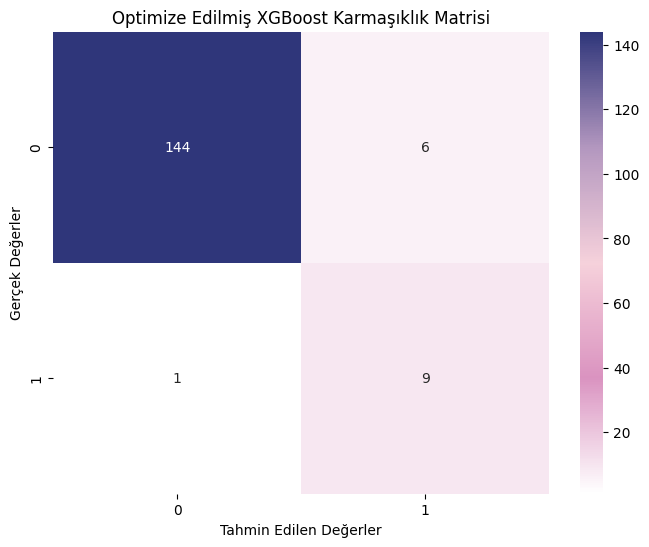

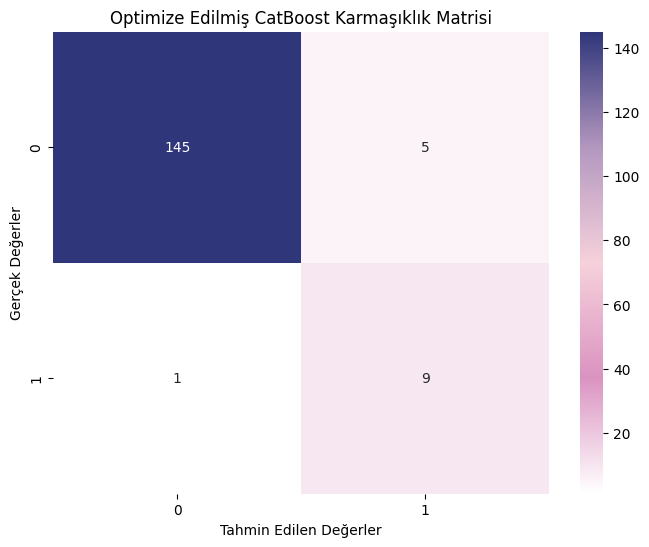

In [ ]:
poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)

print("\n Optimize Edilmiş En İyi 2 Modelin Karmaşıklık Matrisleri:")

for i, (best_model_name, result) in enumerate(top_models, 1):
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'Optimize Edilmiş {best_model_name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()



**Model Optimizasyonu Sonuçları – Pokemon Sınıflandırma Problemi**


---



Bu çalışmada modellemede kullandığımız 6 sınıflandırma algoritması üzerinde `GridSearchCV` ile hiperparametre optimizasyonu uygulanmıştır. Ancak optimizasyon sonrası elde edilen sonuçlar, bazı modellerde performans kaybına yol açmıştır.

---

**📊 Model Performans Karşılaştırması (Accuracy)**

| Model      | Optimizasyon Öncesi | Optimizasyon Sonrası | İyileşme (Fark) |
|------------|----------------------|-----------------------|-----------------|
| **CatBoost** | 0.9625               | 0.9515                | **-0.0110**     |
| **XGBoost**  | 0.9563               | 0.9562                | **-0.0001**     |

---

**📌 Yorumlar**

Model Optimizasyonunda en başarılı sonuç alınan 2 algoritma hakkında:

- **CatBoost** modeli optimizasyon öncesinde en yüksek doğruluk oranını (**%96.25**) vermiştir.
- Grid Search sonrası elde edilen parametre kombinasyonları, özellikle CatBoost için **hafif bir performans düşüşü** yaratmıştır.
- **XGBoost** modeli ise neredeyse sabit kalmış ve varsayılan ayarlarının zaten oldukça başarılı olduğu gözlemlenmiştir.
- Bu nedenle, **model seçiminde optimizasyon öncesi sonuçlar dikkate alınmıştır.**

---

**✅ Sonuç**

Modelleme sürecinde, hiperparametre optimizasyonu her zaman performansı artırmaz. Özellikle sınırlı veri setlerinde varsayılan parametreler çok güçlü sonuçlar verebilir. Bu çalışma, **önceden belirlenen parametrelerle elde edilen performansın korunmasının daha doğru bir tercih** olabileceğini göstermektedir.


# **4. Sonuçların Karşılaştırılması ve Raporlama**

 ## **4.1.  Modellerin Skorlarının Çubuk Grafikle Görselleştirilmesi**

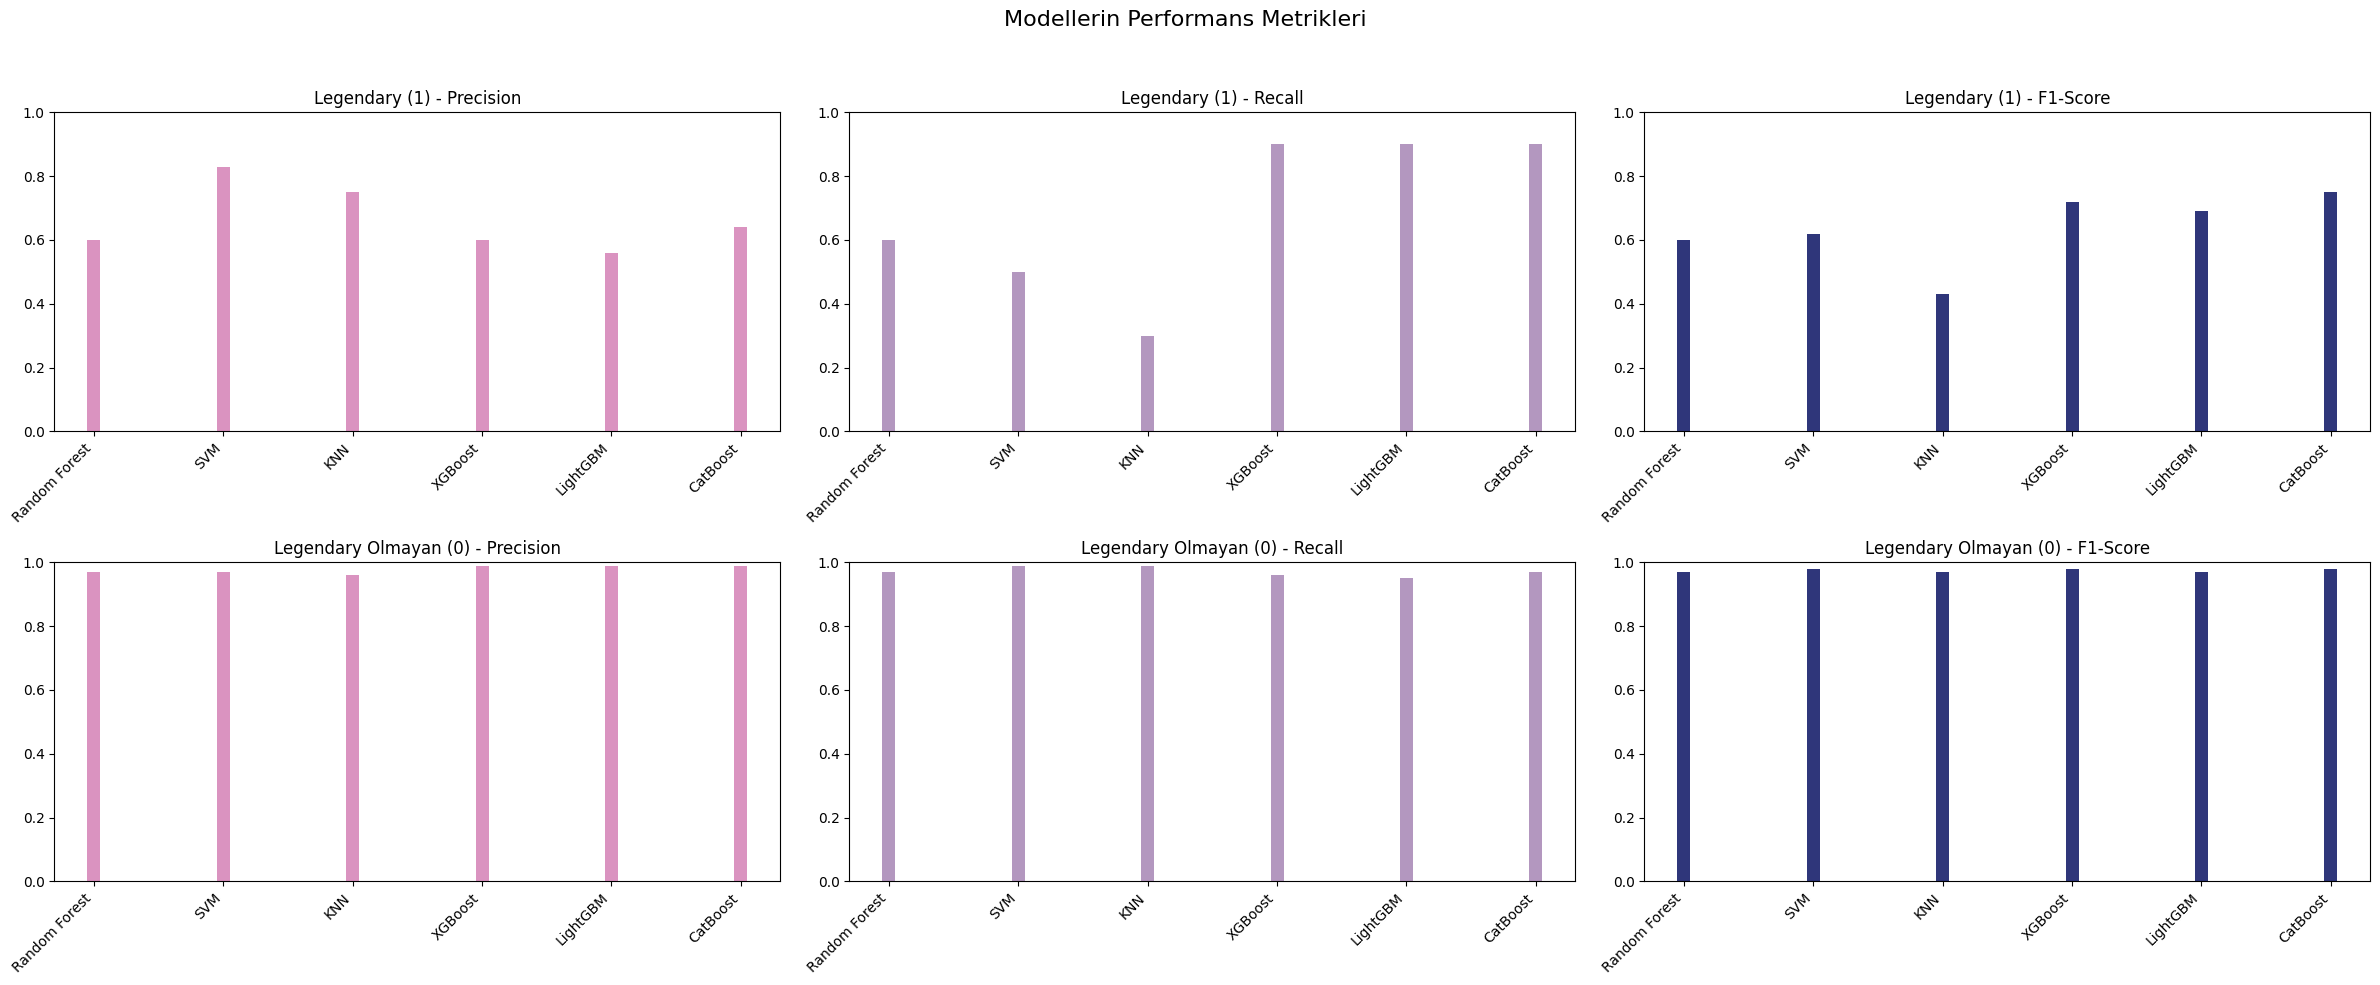

In [ ]:
# Modellerin isimleri
models = ['Random Forest', 'SVM', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost']

# Legendary (1) sınıfı için skorlar
precision_1 = [0.60, 0.83, 0.75, 0.60, 0.56, 0.64]
recall_1    = [0.60, 0.50, 0.30, 0.90, 0.90, 0.90]
f1_1        = [0.60, 0.62, 0.43, 0.72, 0.69, 0.75]

# Legendary olmayan (0) sınıfı için skorlar
precision_0 = [0.97, 0.97, 0.96, 0.99, 0.99, 0.99]
recall_0    = [0.97, 0.99, 0.99, 0.96, 0.95, 0.97]
f1_0        = [0.97, 0.98, 0.97, 0.98, 0.97, 0.98]

# Çubuk genişliği ve pozisyonları
bar_width = 0.1
indices = np.arange(len(models))

fig, axs = plt.subplots(2, 3, figsize=(24, 10))
fig.suptitle('Modellerin Performans Metrikleri', fontsize=16)

# Legendary (1) sınıfı için Precision
axs[0, 0].bar(indices, precision_1, width=bar_width, color='#da93c0')
axs[0, 0].set_title('Legendary (1) - Precision')
axs[0, 0].set_xticks(indices)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
axs[0, 0].set_ylim(0,1)

# Legendary (1) sınıfı için Recall
axs[0, 1].bar(indices, recall_1, width=bar_width, color='#b397bf')
axs[0, 1].set_title('Legendary (1) - Recall')
axs[0, 1].set_xticks(indices)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
axs[0, 1].set_ylim(0,1)

# Legendary (1) sınıfı için F1-Score
axs[0, 2].bar(indices, f1_1, width=bar_width, color='#2f367a')
axs[0, 2].set_title('Legendary (1) - F1-Score')
axs[0, 2].set_xticks(indices)
axs[0, 2].set_xticklabels(models, rotation=45, ha='right')
axs[0, 2].set_ylim(0,1)

# Legendary olmayan (0) sınıfı için Precision
axs[1, 0].bar(indices, precision_0, width=bar_width, color='#da93c0')
axs[1, 0].set_title('Legendary Olmayan (0) - Precision')
axs[1, 0].set_xticks(indices)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
axs[1, 0].set_ylim(0,1)

# Legendary olmayan (0) sınıfı için Recall
axs[1, 1].bar(indices, recall_0, width=bar_width, color='#b397bf')
axs[1, 1].set_title('Legendary Olmayan (0) - Recall')
axs[1, 1].set_xticks(indices)
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')
axs[1, 1].set_ylim(0,1)

# Legendary olmayan (0) sınıfı için F1-Score
axs[1, 2].bar(indices, f1_0, width=bar_width, color='#2f367a')
axs[1, 2].set_title('Legendary Olmayan (0) - F1-Score')
axs[1, 2].set_xticks(indices)
axs[1, 2].set_xticklabels(models, rotation=45, ha='right')
axs[1, 2].set_ylim(0,1)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Legendary 1 ve 0 sınıfları için tüm modellerin recall, precision ve F1-Score değerleri çubuk grafikle çizdirildi..

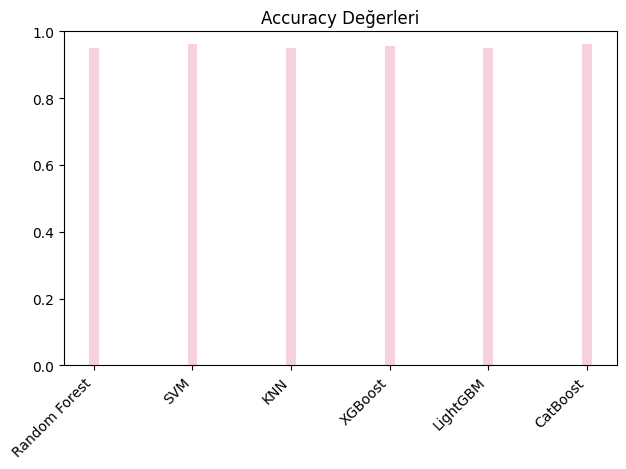

In [ ]:
# Modellerin isimleri
models = ['Random Forest', 'SVM', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost']

accuracy = [0.9500, 0.9625, 0.9500, 0.9563, 0.9500, 0.9625]

# Accuracy Skorları
plt.bar(indices, accuracy, width=bar_width, color='#f6d1db')
plt.title('Accuracy Değerleri')
plt.xticks(indices, models, rotation=45, ha='right')
plt.ylim(0,1)


plt.tight_layout()
plt.show()

Tüm modellerin accuracy değerleri çubuk grafikle çizdirildi..

 ## **4.2. Model Performansı Yorumlama**

**Legendary (1) Sınıfı İçin En İyi Performans Gösteren Modeller**

---

**En Yüksek Recall (0.90) ile Öne Çıkanlar:**
- **CatBoost**, **XGBoost**, **LightGBM**  
  ✅ Gerçek Legendary Pokemonların %90’ını doğru şekilde tespit ediyorlar.  
  ✅ Bu modeller, **Gradient Boosting** algoritmalarıdır.  
  ✅ Karmaşık örüntüleri öğrenmede ve **non-lineer** ilişkileri yakalamada başarılıdır.

---

**En Yüksek Precision (0.83):**
- **SVM (Support Vector Machine)**  
  ✅ Yanlış pozitif oranı en düşük modeldir.  
  ❌ Ancak recall değeri düşük (0.50) → birçok gerçek Legendary Pokemonu kaçırıyor.

---

**Düşük Precision Örneği:**
- **Random Forest**
  - Precision: **0.60**
  - Model, çok fazla **Pokemonu yanlışlıkla "Legendary"** olarak sınıflandırıyor.

---

**Kritik Bulgular**

---

**Trade-off Problemi:**
- **SVM:**  
  ✅ Yüksek precision (**0.83**)  
  ❌ Düşük recall (**0.50**)  
  > → **Çok muhafazakar** bir model; yanlış alarm vermemeye odaklanıyor, ancak çok fazla gerçek Legendary’yi kaçırıyor.

---

**En Dengeli Performans:**
- **CatBoost:**

  Precision: **0.64**

  Recall: **0.90**

  F1-Score: **Yaklaşık 0.75**
  > Hem doğru tahmin oranı hem de kaçırmama oranı açısından dengeli bir modeldir.

---

**Legendary Olmayan (0) Sınıfı Performansı**

---

- Tüm modellerde mükemmel sonuçlar:  
  - Recall: **0.97 - 1.00**
- **Neden?**  
  → Veri setinde Legendary olmayan örneklerin çok daha fazla olması, bu modellerin çoğunluk sınıfı daha kolay öğrenmesine neden olur.


 ## **4.3.  Özellik Önem Skorları**

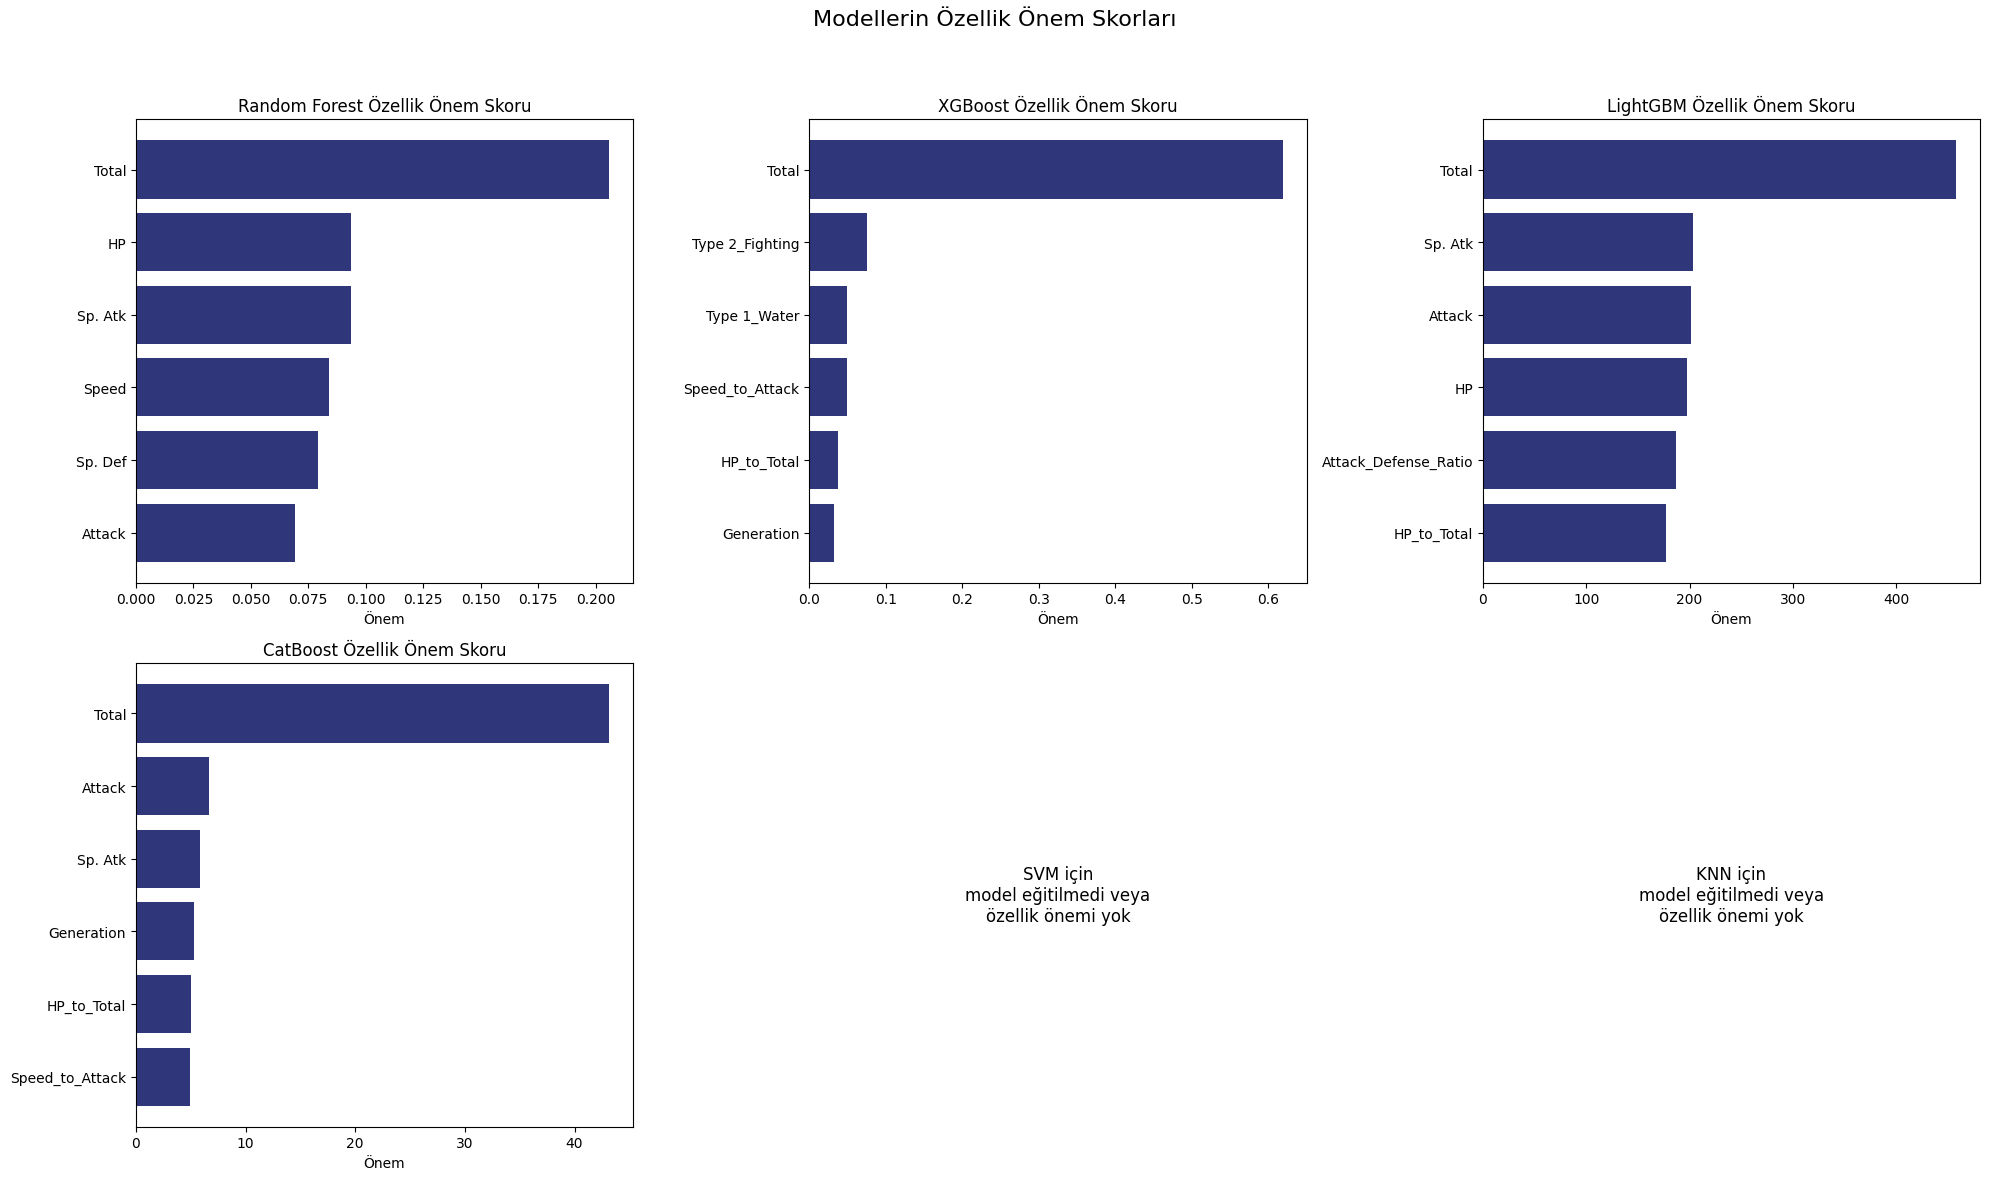

In [ ]:
# Modeller ve isimleri
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'SVM': None,  # Özellik önemi yok
    'KNN': None   # Özellik önemi yok
}

fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Modellerin Özellik Önem Skorları', fontsize=16)
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    ax = axs[i]
    if model is not None:
        model.fit(X_train, y_train)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)  # En iyi 6 özellik
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} Özellik Önem Skoru")
            ax.set_xlabel("Önem")
        else:
            ax.text(0.5, 0.5, f"{name} için\nözellik önemi\nbulunmamaktadır",
                    ha='center', va='center', fontsize=12)
            ax.set_axis_off()
    else:
        ax.text(0.5, 0.5, f"{name} için\nmodel eğitilmedi veya\nözellik önemi yok",
                ha='center', va='center', fontsize=12)
        ax.set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**En Önemli Özellikler**





- Total özelliği tüm modellerde (Random Forest, XGBoost, LightGBM, CatBoost) açık ara en önemli özellik olarak öne çıkıyor. Bu, Pokemonun toplam istatistiklerinin Legendary olup olmadığını belirlemede kritik rol oynadığını gösteriyor.


---



**Model Bazında Farklılıklar**

- Random Forest: HP, Sp_Atk, Speed, Sp_Def ve Attack gibi temel istatistiklere odaklanıyor ve bu özelliklere nispeten eşit önem veriyor.
- XGBoost: Type_2_Fighting, Type_1_Water gibi Pokemon türlerine ve Speed_to_Attack oranına önem veriyor. Bu model tür bilgisini daha fazla kullanıyor ve görece daha az özellik kullanıyor.
- LightGBM: Sp_Atk, Attack, HP gibi saldırı odaklı istatistiklere ve Attack_Defense_Ratio gibi oransal özelliklere ağırlık veriyor.
- CatBoost: Attack, Sp_Atk, Generation gibi özelliklere odaklanıyor.
---

**Modelin Olmadığı Durumlar**

SVM ve KNN için "model eğitilmedi veya özellik önemi yok" notu düşülmüş. Bu modeller doğrudan özellik önem skorları sağlamıyor. Çünkü Random Forest, XGBoost, LightGBM, CatBoost gibi ağaç tabanlı modeller kendi içinde `feature_importances_` özelliğine sahiptir, yani her özelliğin modele katkısını sayısal olarak çıkarabilir. Ancak KNN ve SVM gibi modellerde bu doğrudan yapılamadığı için None atandı ve grafiklerde "özellik önemi yok" diye gösteriliyor..

---

**Genel Çıkarım**

Legendary Pokemonları ayırt etmede en kritik faktör toplam istatistik değeri. Farklı algoritmalar farklı özelliklere odaklanıyor, bu da ensemble yaklaşımların neden etkili olabileceğini açıklıyor.

# **5. Bonus**

 ## **5.1. SMOTE veya Benzeri Yöntemlerle Sınıf Dengesizliğini Düzeltme ve Etkiyi Gözlemleme**

In [ ]:
# Hedef değişkenin içeriği
print("Legendary değerleri:", df["Legendary"].unique())

# Eğitim/test verilerinde hedef değişkenin dağılımı
print("y_train sınıf dağılımı")
print(y_train.value_counts())

print("y_test sınıf dağılımı")
print(y_test.value_counts())


Legendary değerleri: [False  True]
y_train sınıf dağılımı
legendary_label
0    585
1     55
Name: count, dtype: int64
y_test sınıf dağılımı
legendary_label
0    150
1     10
Name: count, dtype: int64


Görüldüğü üzerede veri setimiz oldukça dengesiz bu nedenle smote yöntemini uygulayacağız..

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Eğitim ve test verisini ayırırken stratify kullanma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Eğitim verisi - orijinal sınıf dağılımı:", Counter(y_train))

# SMOTE ile çoğaltma oranını %90 olarak ayarlayalım
smote = SMOTE(random_state=42, sampling_strategy=0.9)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE sonrası eğitim verisi - sınıf dağılımı:", Counter(y_train_resampled))



Eğitim verisi - orijinal sınıf dağılımı: Counter({0: 514, 1: 46})
SMOTE sonrası eğitim verisi - sınıf dağılımı: Counter({0: 514, 1: 462})


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}


Random Forest Sonuçları:
Doğruluk: 0.9417

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.59      0.84      0.70        19

    accuracy                           0.94       240
   macro avg       0.79      0.90      0.83       240
weighted avg       0.95      0.94      0.95       240



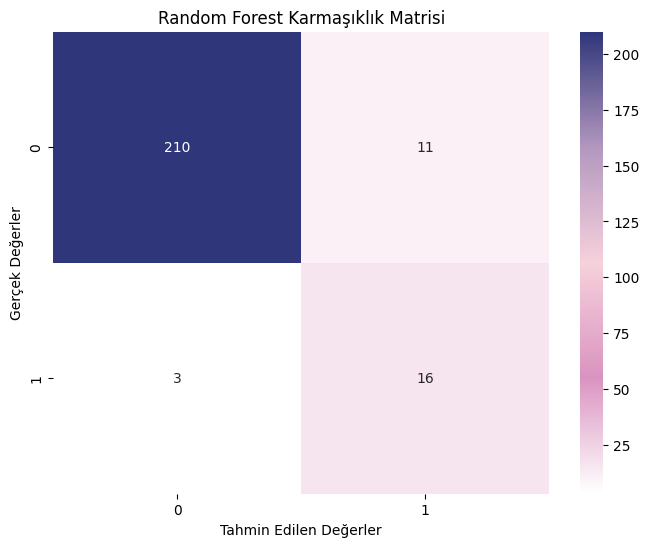


SVM Sonuçları:
Doğruluk: 0.9333

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       221
           1       0.62      0.42      0.50        19

    accuracy                           0.93       240
   macro avg       0.78      0.70      0.73       240
weighted avg       0.92      0.93      0.93       240



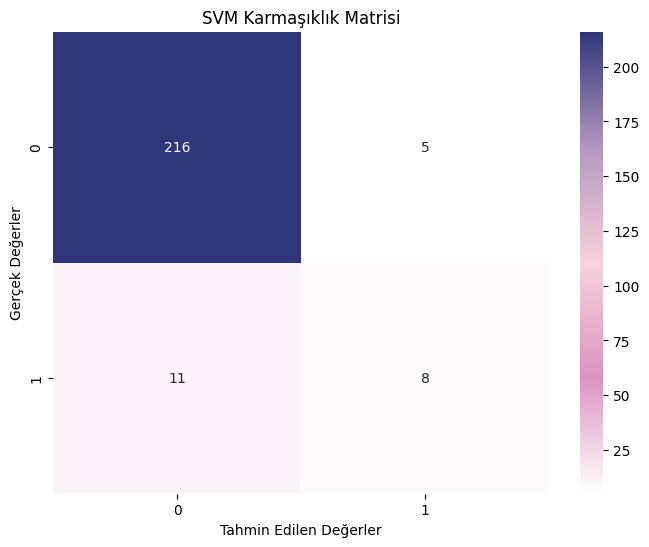


KNN Sonuçları:
Doğruluk: 0.9292

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       221
           1       0.56      0.47      0.51        19

    accuracy                           0.93       240
   macro avg       0.76      0.72      0.74       240
weighted avg       0.92      0.93      0.93       240



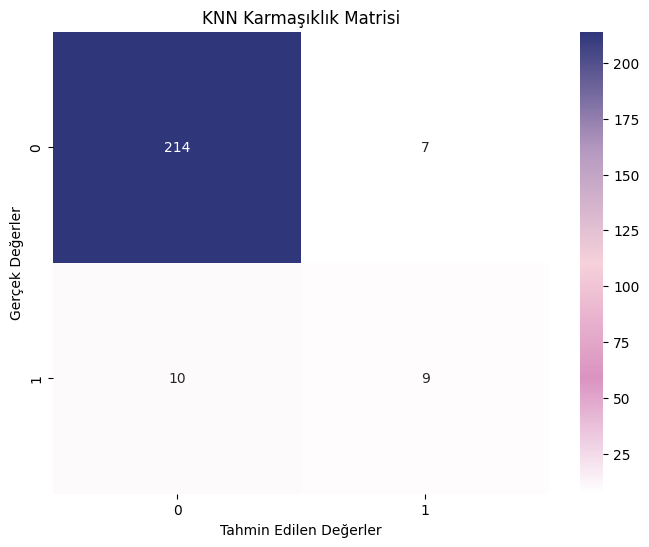


XGBoost Sonuçları:
Doğruluk: 0.9458

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.62      0.84      0.71        19

    accuracy                           0.95       240
   macro avg       0.80      0.90      0.84       240
weighted avg       0.96      0.95      0.95       240



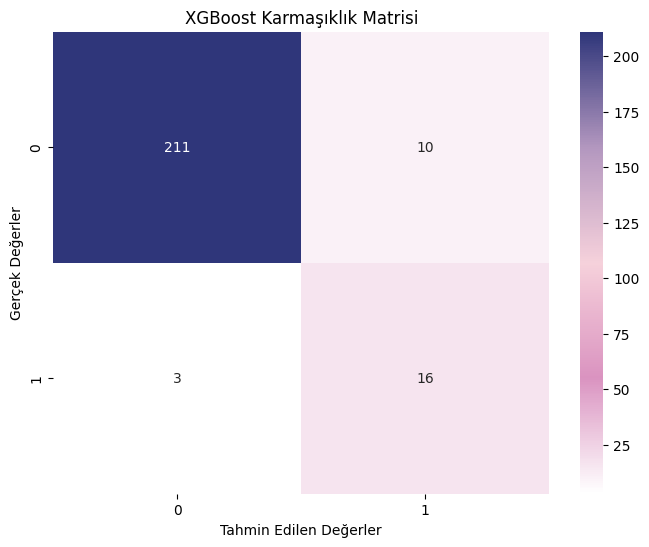


LightGBM Sonuçları:
Doğruluk: 0.9542

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       221
           1       0.65      0.89      0.76        19

    accuracy                           0.95       240
   macro avg       0.82      0.93      0.87       240
weighted avg       0.96      0.95      0.96       240



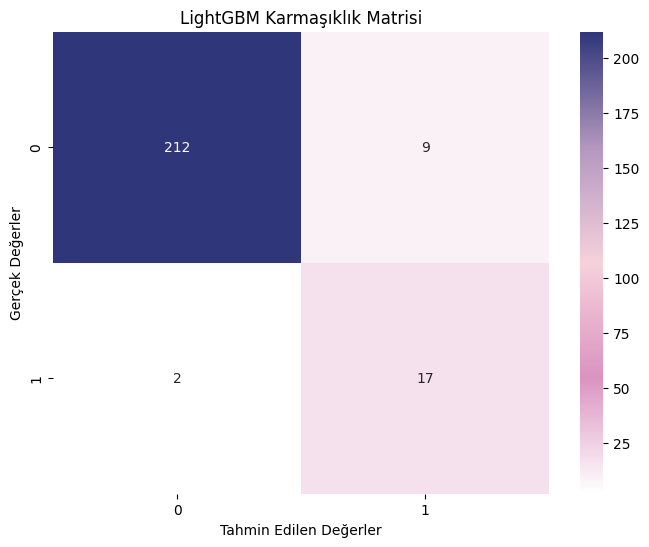


CatBoost Sonuçları:
Doğruluk: 0.9375

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       221
           1       0.57      0.84      0.68        19

    accuracy                           0.94       240
   macro avg       0.78      0.89      0.82       240
weighted avg       0.95      0.94      0.94       240



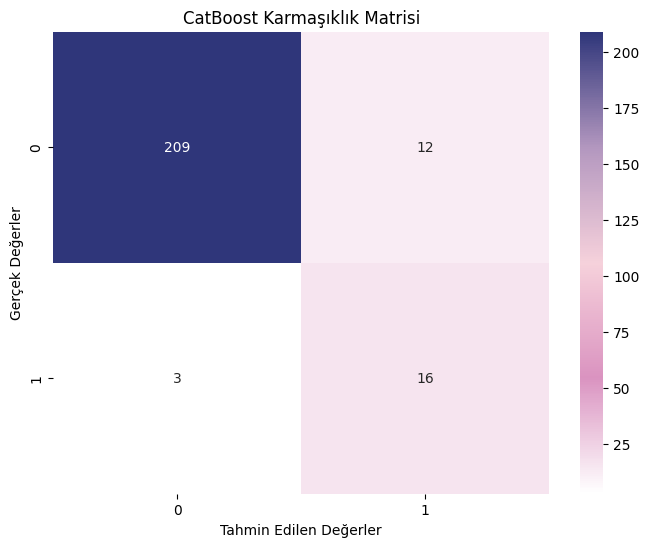

In [ ]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    # Model eğitimi (SMOTE sonrası veriyi kullan)
    model.fit(X_train_resampled, y_train_resampled)

    # Tahminler (test verisi üzerinde)
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk: {results[name]['accuracy']:.4f}")
    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])

    poke_color = ['#ffffff', '#da93c0', '#f6d1db', '#b397bf', '#2f367a']
    confusion_cmap = mcolors.LinearSegmentedColormap.from_list("confusion_cmap", poke_color, N=256)

    # Karmaşıklık matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap=confusion_cmap)
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()


**📊 SMOTE Uygulaması Öncesi vs Sonrası Performans Karşılaştırması**


---


Dengesiz veri setlerinde, özellikle azınlık sınıfın (Legendary - Sınıf 1) çok az gözlem içerdiği durumlarda modeller, çoğunluk sınıfı (Non-Legendary - Sınıf 0) öğrenmeye meyillidir. Bu da genellikle yüksek doğruluk (accuracy) skorları üretse de azınlık sınıf için düşük recall ve f1 score değerlerine neden olur.

SMOTE (Synthetic Minority Over-sampling Technique) uygulanarak azınlık sınıf örnekleri sentetik olarak artırılmış ve sınıf dağılımı dengelenmiştir. Bu sayede modellerin azınlık sınıfa dair öğrenme kapasitesi artmış, sonuç olarak sınıf 1 için recall ve f1 score değerleri belirgin şekilde iyileşmiştir.


---



**🔍 SMOTE Uygulaması Öncesi ve Sonrası Performans Tablosu**


---



| Model        | Accuracy (Önce) | Accuracy (Sonra) | Sınıf 1 Recall (Önce) | Sınıf 1 Recall (Sonra) |
|--------------|------------------|-------------------|------------------------|-------------------------|
| Random Forest | 0.95             | 0.94              | 0.60                   | 0.84                    |
| SVM           | 0.96             | 0.93              | 0.50                   | 0.42                    |
| KNN           | 0.95            | 0.93              | 0.30                   | 0.47                    |
| XGBoost       | 0.96             | 0.95              | 0.90                   | 0.84                    |
| LightGBM      | 0.95             | 0.95              | 0.90                   | 0.89                    |
| CatBoost      | 0.96             | 0.94              | 0.90                   | 0.84                    |

---

 **✅ Gözlemler**

---

SMOTE uygulaması, özellikle Random Forest ve KNN gibi modellerde sınıf 1 için recall artışı sağlayarak azınlık sınıfın daha iyi öğrenilmesine katkı sağlamıştır.

XGBoost, LightGBM ve CatBoost modelleri, SMOTE öncesinde de yüksek performans gösterdiğinden, SMOTE sonrası değişim göreceli olarak daha azdır.

SVM modeli, SMOTE sonrasında sınıf 1 performansında diğerlerine oranla (accuracy 96'dan 93'e) düşüş göstermiş, bu da her modelin SMOTE’tan aynı şekilde faydalanmadığını göstermektedir.

Genel olarak doğruluk (accuracy) skorlarında çok büyük kayıplar yaşanmazken, azınlık sınıf performansında belirgin artışlar ya da küçük azalmalar gözlemlenmiştir.
